#### JupyterNotebook Gruppe A
# Untersuchung der Zusammensetzung der Bevölkerung im Zuge des Bevölkerungsanstieges der Stadt Magdeburg von 2004 bis 2017

## Inhaltsverzeichnis
1. Einleitung und Forschungsfrage
2. Datenaufbereitung
3. Berechnungen und Ergebnisse<br>
3.1 Demografische Zuzsammensetzung<br>
3.1.1 Prozentuale Verteilung der Altersklassen "Personen unter 18 Jahren" und "Personen über 65 Jahren" in den Jahren 2004, 2010 und 2017<br>
3.1.2 Grafische Darstellung der beiden Verhältnisse<br>
3.1.3 Stadtteile, die über oder unter dem Durchschnitt liegen<br>
3.1.4 Korrelation zwischen dem Durchschnittsalter und der Jugendquote (Personen unter 18 Jahren)<br>
<br>
3.2 Ethnische Zusammensetzung <br>
3.2.1 Anteile der Ausländischen Bevölkerung in den Jahren 2004, 2010 und 2017<br>
3.2.2 Segregationsindex für die Ausländische Bevölkerung in den Jahren 2004, 2010 und 2017<br>
3.2.3 Verteilung der Ausländischen Bevölkerung in den Stadtteilen<br>
3.2.4 Korrelation zwischen der Ausländischen Bevölkerung und dem Durchschnittsalter<br>
<br>
3.3 Gender Zusammensetzung<br>
3.3.1 Anteile der männlichen und weiblichen Bevölkerung in Magdeburg<br>
3.3.2 Segregationsindex für die beiden Geschlechter für die Zeitpunkte 2004, 2010 und 2017
4. Ergebnisse
5. Diskussion 
6. Literatur <br/>

## 1. Einleitung und Forschungsfrage

2004 hatte Magdeburg mit 226.675  Einwohnern den geringsten Einwohnerwert seit der Wiedervereinigung 1990 erreicht (Amt für Statistik 2018a, S. 11). Seitdem ist die Bevölkerungszahl wieder kontinuierlich gestiegen. 2017 lebten mit 241.769 Einwohnern 6,24% mehr Menschen in der Stadt als noch 2004. 

Die 5. Regionalisierte Bevölkerungsprognose (RBP) für Sachsen-Anhalt ging 2008 noch von einer Stadtbevölkerung von 232.154 Einwohnern für das Jahr 2017 aus. Diese Prognose ging mit einem stetigen Bevölkerungsrückgang in den darauffolgenden Jahren einher (Statistisches Landesamt Sachsen-Anhalt 2010, S. 25). 

Der 2006 von der Bertelsmann Stiftung publizierte “Wegweiser Demographischer Wandel 2020” ging sogar noch einen Schritt weiter und prognostizierte für das Jahr 2020 einen Bevölkerungsrückgang um 11,2%, verglichen mit dem Stichjahr 2003. Dies entspräche, bei einer Bevölkerung von ursprünglich 227.129 Menschen (Stand: 2003), nur noch 201.691 Einwohner (Bertelsmann Stiftung 2006, S. 43).

Gleichzeitig reduzierte sich die Bevölkerung in Sachsen-Anhalt zwischen 2016 und 2017 um -0,6%, von 2,236 Mio. auf 2,223 Mio. Menschen (Statistisches Bundesamt 2018). Im selben Zeitraum wuchs die Bevölkerung der Landeshauptstadt Magdeburg von 238.136 im Jahr 2016 auf 241.769  im Jahr 2017 (Amt für Statistik 2018a, S. 11). Das bedeutet einen Bevölkerungsanstieg von 1,5%. Das bundesdeutsche Bevölkerungswachstum betrug im selben Zeitraum +0,3 % (Statistisches Bundesamt 2018).

#### Grafik der Bevölkerungsentwicklung in Magdeburg von 2004 bis 2017 

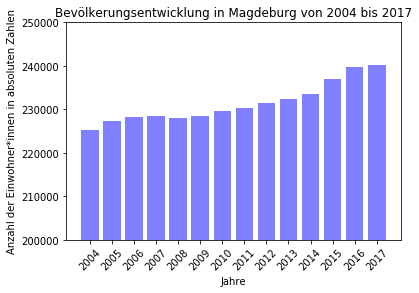

In [2]:
#Importieren des Python-Pakets Pandas sowie des Numpy-Pakets
import pandas as pd
import numpy as np

#Einlesen des Forschungsdatensatzes der Version 007
magdeb007 = pd.read_csv("MagdeburgBereinigterDatensatzVers007.csv", sep = ";", decimal=",")

#Importieren des Python-Pakets matplot.lib
import matplotlib.pyplot as plt

#Liste/Dictionary erstellen für die Einwohnerentwicklung von 2004 bis 2017 
einwohner04bis17 = (sum(magdeb007['EW_2004']), 
                    sum(magdeb007['EW_2005']),
                    sum(magdeb007['EW_2006']),
                    sum(magdeb007['EW_2007']),
                    sum(magdeb007['EW_2008']),
                    sum(magdeb007['EW_2009']),
                    sum(magdeb007['EW_2010']),
                    sum(magdeb007['EW_2011']),
                    sum(magdeb007['EW_2012']),
                    sum(magdeb007['EW_2013']),
                    sum(magdeb007['EW_2014']),
                    sum(magdeb007['EW_2015']),
                    sum(magdeb007['EW_2016']),
                    sum(magdeb007['EW_2017']))

jahre = ('2004', '2005', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017')
y_pos = np.arange(len(jahre))

plt.bar(y_pos, einwohner04bis17, align='center', alpha=0.5, color='Blue')
plt.xticks(y_pos, jahre, rotation=45)
plt.ylabel('Anzahl der Einwohner*innen in absoluten Zahlen')
plt.xlabel('Jahre')
plt.title('Bevölkerungsentwicklung in Magdeburg von 2004 bis 2017')
plt.ylim((200000,250000))

plt.show()

Die Projektgruppe möchte sich in Anbetracht des Bevölkerungsanstieges deshalb mit folgender Forschungsfrage beschäftigen:

#### “Inwieweit hat sich im Zuge des Bevölkerungsanstieges der Stadt Magdeburg von 2004 bis 2017 die Zusammensetzung der Bevölkerung verändert?”

Diese Kernfrage wird anhand von drei weiteren Unterfragen spezifiziert:

#### 1. Wie setzt(e) sich die Bevölkerung im Jahr 2004 gegenüber der Bevölkerung im Jahr 2010 und 2017 demografisch, ethnisch und geschlechtlich zusammen?

Zur Beantwortung der ersten Unterfrage der Forschungsfrage werden die demografischen Daten für: Jugendquote, Altenquote, Ausländische Bevölkerung, Weiblicher Teil der Bevölkerung und Männlicher Teil der Bevölkerung für die Jahre 2004, 2010 und 2017 benötigt.

#### 2. Hat die Zunahme der Ausländischen Bevölkerung zu einer Verjüngung der Einwohner geführt?

Für die zweite Unterfrage wird die Korrelation zwischen zwischen der Ausländischen Bevölkerung und dem Durchschnittsalter der Bevölkerung ermittelt. Die hierfür benötigten Parameter sind: Ausländische Bevölkerung und Durchschnittsalter.

#### 3. Hat die ethnische Segregation bei der Ausländischen Bevölkerung zugenommen?

Die letzte Unterfrage erfordert die Berechnung der ethnischen Segregation der ausländischen Bevölkerung von 2004, 2010 und 2017 in sämtlichen Stadtteilen. Die zur Berechnung der ethnischen Segregation genutzten Parameter waren: Ausländische Bevölkerung und Einwohner.

## 2. Datenaufbereitung

Die benötigten Daten werden von der Stadt Magdeburg unter folgendem Link bereit gestellt:
https://www.magdeburg.de/extern/statistik/stadtteilkatalog/atlas.html (letzer Zugriff: 06.01.2019).<br>
#### Die Abkürzungen für die verschiedenen Ursprungs-Variablen haben folgende Bedeutung:
<br> EW = Einwohnerzahl <br/>
<br> JQ = Jugendquote <br/>
<br> MBEV = Männlicher Teil der Bevölkerung <br/>
<br> WBEV = Weiblicher Teil der Bevölkerung <br/>
<br> ABEV = Ausländische Bevölkerung <br/>
<br> AQ = Altenquote <br/>
<br> DA = Durchschnittsalter <br/>

<br> Die Jahreszahlen werden mit:_2004 - _2017 wiedergegeben<br/>

#### Weitere Bezeichnungen sind:
<br> STD_name = Stadtteilname <br/>
<br> STD_NR = Stadtteilnummer <br/>
<br> MAQ_V_JQ = Mittlere Altersquote vs. Jugendquote <br/>
<br> MAQ_V_AQ = Mittlere Altersquote vs. Altenquote <br/>


<br>Im Folgenden wird einmal der Datensatz zur Ansicht eingelesen:<br/>

In [37]:
# Anzeigen des Forschungsdatensatzes
print(magdeb007)

    STD_NR           STD_name  EW_2004  EW_2005  EW_2006  EW_2007  EW_2008  \
0        1           Altstadt    12786    13580    13892    14140    14532   
1        2             Werder     2490     2594     2691     2663     2709   
2        4      Alte Neustadt     9050     9183     9347     9534     9641   
3        6      Neue Neustadt    13572    13566    13583    13631    13757   
4        8     Neustädter See    11902    11784    11829    11784    11557   
5       10        Kannenstieg     6877     6735     6676     6594     6383   
6       12    Neustädter Feld     9828    10011     9980     9946     9847   
7       18           Nordwest     4547     4511     4522     4544     4609   
8       20     Alt Olvenstedt     3945     4111     4262     4278     4199   
9       22     Neu Olvenstedt    14257    13488    12733    12017    11741   
10      24      Stadtfeld Ost    22225    22912    23506    23923    24170   
11      26     Stadtfeld West    14367    14528    14844    1483

## 3. Berechnung

### 3.1 Demografische Zusammensetzung

Die von der Stadt Magedeburg bereit gestellten Daten geben prozentuale Quoten für die Altersklassen "Personen unter 18 Jahren im Verhältnis zu Personen zwischen 18 und 65 Jahren" und prozentuale Quoten für "Personen über 65 Jahre im Verhältnis zu Personen zwischen 18 und 65 Jahren" wieder. Von diesen lassen sich nicht auf die Grundgesamtheiten der drei Altersklassen "Personen unter 18 Jahre", "Personen zwischen 18 und 65 Jahre" und "Personen über 65 Jahre" schließen. Somit kann im Folgenden nur für die beiden Verhältnisse "Personen unter 18 Jahren im Verhältnis zu Personen zwischen 18 und 65 Jahren" und "Personen über 65 Jahre im Verhältnis zu Personen zwischen 18 und 65 Jahren" nur die Verteilung in den Stadtteilen dargestellt werden.

Die Bildung des demografischen Segregationsindex ist nicht möglich, da von der prozentualen Verteilung innerhalb der Stadtteile nicht auf eine Grundgesamtheit für die beiden Altersverhältnisse geschlossen werden kann. Damit kann dann nicht die relativen Anteile aller Stadtteile in Bezug auf gesamt Magedeburg berechnet werden.

Dennoch soll über eine Korrelationsrechnung zwischen dem Durchschnittsalter und dem prozentualen Anteil der Personen unter 18 Jahren in den Stadtteilen geschaut werden, ob eine Konzentration von Personen unter 18 Jahren in bestimmten Stadtteilen vorliegt. Annahme: Sind hohe Anteile an Personen unter 18 Jahren in dem Stadtteilen vertreten, müsste das Durchschnittsalter sinken, sprich eine gegenläufige bzw. negative Korrelation vorliegen. Wenn das nicht der Fall ist, kann davon ausgegangen werden, dass die Personen unter 18 Jahren sich nicht nur auf einige Stadtteile konzentrieren, sondern gleichverteilen und somit keinen gegenläufigen Effekt mehr auf das Durchschnittsalter haben. Es wird dann eine Korrelation nahe 0 erwartet.

#### Ziele:
1. Errechnen der prozentualen Quoten für "Personen zwischen 18 und 65 Jahren", für die beiden Verhältnisse "Personen unter 18 Jahren" und "Personen zwischen 18 und 65 Jahren" (Kapitel 3.1.1)
2. Grafische Darstellung der beiden Verhältnisse für die drei Jahrespunkt 2004, 2010 und 2017 (6 Grafiken) (Kapitel 3.1.2)
3. Hervorheben der Stadtteile, die jeweils um eine Standardabweichung über oder unter dem Durchschnittswert über alle Altersquoten (für beide Altersverhältnisse) für alle drei Zeitpunkte liegen (Kapitel 3.1.3)
4. Korrelationen zwischen dem Durchschnittsalter und der Jugendquote im Zeitverlauf (2004-2017) und in den Stadtteilen für die drei Zeitpunkte 2004, 2010 und 2017 sowie deren grafische Darstellung (4 Grafiken) (Kapitel 3.1.4)

#### 3.1.1 Prozentuale Verteilung der Altersklassen "Personen unter 18 Jahren" und "Personen über 65 Jahren" in den Jahren 2004, 2010 und 2017

In [3]:
# benötigte Variablen

# magdeb007["AQ_2004"]
# magdeb007["JQ_2004"]

# magdeb007["AQ_2010"]
# magdeb007["JQ_2010"]

# magdeb007["AQ_2017"]
# magdeb007["JQ_2017"]

# Es werden die prozentualen Anteile für die Personen zwischen 18 und 65 Jahren im Verhältnis zu den Personen über 65 Jahren
# berechnet.
# Dafür werden von 100% die Quoten der Personen über 65 Jahren ("AQ_2004") abgezogen und in einer neuen Variable für Personen
# zwischen 18 und 65 Jahren im Verhältnis zu Personen über 65 Jahren gespeichert ("MAQ_V_AQ_2004").
# Diese Berechnung erfolgt für die drei Zeitpunkte 2004, 2010 und 2017.
magdeb007["MAQ_V_AQ_2004"] = 100 - magdeb007["AQ_2004"]
magdeb007["MAQ_V_AQ_2010"] = 100 - magdeb007["AQ_2010"]
magdeb007["MAQ_V_AQ_2017"] = 100 - magdeb007["AQ_2017"]

# Es werden die prozentualen Anteile für die Personen zwischen 18 und 65 Jahren im Verhältnis zu den Personen unter 18 Jahren
# berechnet.
# Dafür werden von 100% die Quoten der Personen unter 18 Jahren ("JQ_2004") abgezogen und in einer neuen Variable für Personen
# zwischen 18 und 65 Jahren im Verhältnis zu Personen unter 18 Jahren gespeichert ("MAQ_V_JQ_2004").
# Diese Berechnung erfolgt für die drei Zeitpunkte 2004, 2010 und 2017.
magdeb007["MAQ_V_JQ_2004"] = 100 - magdeb007["JQ_2004"]
magdeb007["MAQ_V_JQ_2010"] = 100 - magdeb007["JQ_2010"]
magdeb007["MAQ_V_JQ_2017"] = 100 - magdeb007["JQ_2017"]

print(magdeb007)
print("")
print("Dass das Anbinden der Variablen funktinoniert hat, sieht man daran, dass die Zusammenfassung am Ende des prints von magde um 3 colums gestiegen ist")

# Die drei neuen Variablen als Dataframe und die Stadtteile
#help(pd.DataFrame)
print("")
print("")
print("Die drei neuen Variablen:")
print("")
print("Personen zwischen 18 und 65 Jahren im Verhältnis zu Personen über 65 Jahren:")
print(magdeb007[["MAQ_V_AQ_2004", "MAQ_V_AQ_2010", "MAQ_V_AQ_2017"]])
print("")
print("Personen zwischen 18 und 65 Jahren im Verhältnis zu Personen unter 18 Jahren:")
print(magdeb007[["MAQ_V_JQ_2004", "MAQ_V_JQ_2010", "MAQ_V_JQ_2017"]])

    STD_NR           STD_name  EW_2004  EW_2005  EW_2006  EW_2007  EW_2008  \
0        1           Altstadt    12786    13580    13892    14140    14532   
1        2             Werder     2490     2594     2691     2663     2709   
2        4      Alte Neustadt     9050     9183     9347     9534     9641   
3        6      Neue Neustadt    13572    13566    13583    13631    13757   
4        8     Neustädter See    11902    11784    11829    11784    11557   
5       10        Kannenstieg     6877     6735     6676     6594     6383   
6       12    Neustädter Feld     9828    10011     9980     9946     9847   
7       18           Nordwest     4547     4511     4522     4544     4609   
8       20     Alt Olvenstedt     3945     4111     4262     4278     4199   
9       22     Neu Olvenstedt    14257    13488    12733    12017    11741   
10      24      Stadtfeld Ost    22225    22912    23506    23923    24170   
11      26     Stadtfeld West    14367    14528    14844    1483

#### 3.1.2 Grafische Darstellung der beiden Verhältnisse

##### Personen zwischen 18 und 65 Jahren im Verhältnis zu Personen über 65 Jahren

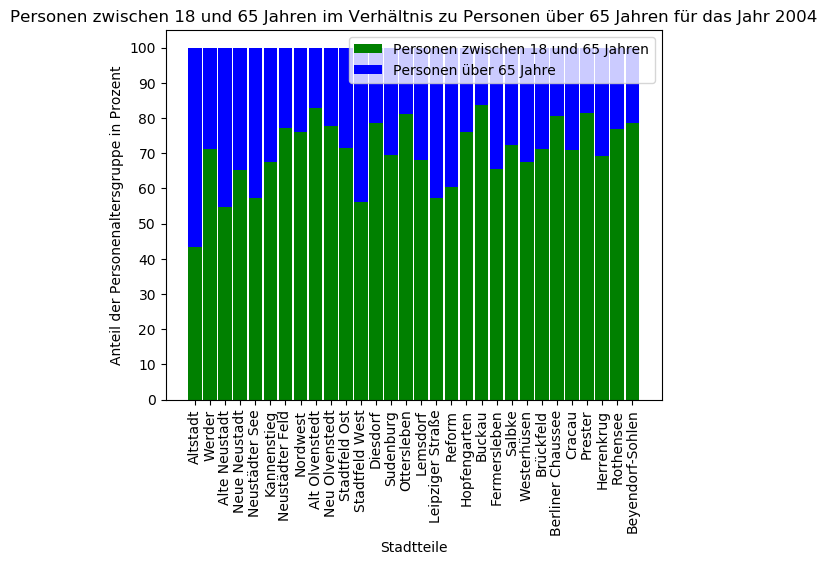

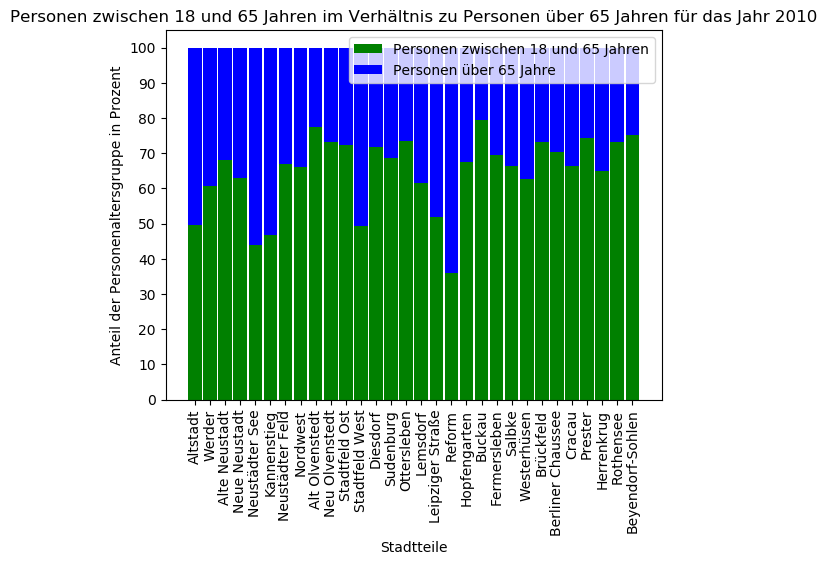

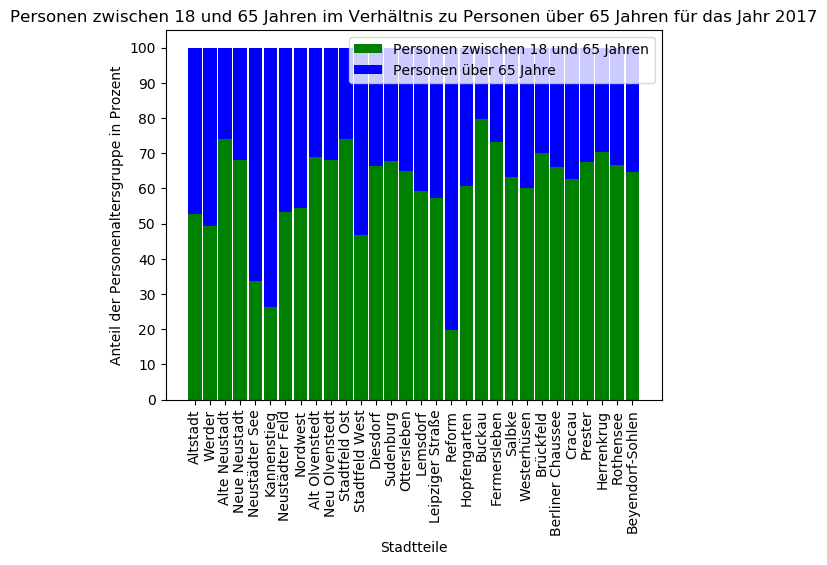

In [4]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# Variablen, die für alle Grafiken gelten
# Ich verändere das DataFrame in eine list, welche ich in eine tulpe verwandle
stadtteile = (tuple(list(magdeb007["STD_name"]))) 

# Balkendiagramm für das Verhältnis Personen über 65 Jahren
# für 2004
y_pos = np.arange(len(stadtteile))
MA_2004 = tuple(list(magdeb007["MAQ_V_AQ_2004"]))
A_2004 = tuple(list(magdeb007["AQ_2004"]))
balkBreit = 0.9 #Breite der Balken

# Die Balken erstellen
bar_MA = plt.bar(y_pos, MA_2004, balkBreit, color="green")
bar_A = plt.bar(y_pos, A_2004, balkBreit, bottom=MA_2004, color="blue")
# Über das Argument bottom= lege ich fest, dass die Balken übereinander gestapelt werden sollen und welche Variable darunter
# liegen soll.

plt.xlabel('Stadtteile')
plt.ylabel('Anteil der Personenaltersgruppe in Prozent')
plt.title('Personen zwischen 18 und 65 Jahren im Verhältnis zu Personen über 65 Jahren für das Jahr 2004')
plt.xticks(y_pos, stadtteile, rotation=90)
plt.yticks(np.arange(0, 101, 10))
plt.legend((bar_MA[0], bar_A[0]), ('Personen zwischen 18 und 65 Jahren', 'Personen über 65 Jahre'))

plt.show()

# für 2010
y_pos = np.arange(len(stadtteile))
MA_2010 = tuple(list(magdeb007["MAQ_V_AQ_2010"]))
A_2010 = tuple(list(magdeb007["AQ_2010"]))
balkBreit = 0.9 #Breite der Balken

# Die Balken erstellen
bar_MA = plt.bar(y_pos, MA_2010, balkBreit, color="green")
bar_A = plt.bar(y_pos, A_2010, balkBreit, bottom=MA_2010, color="blue")
# Über das Argument bottom= lege ich fest, dass die Balken übereinander gestapelt werden sollen und welche Variable darunter
# liegen soll.

plt.xlabel('Stadtteile')
plt.ylabel('Anteil der Personenaltersgruppe in Prozent')
plt.title('Personen zwischen 18 und 65 Jahren im Verhältnis zu Personen über 65 Jahren für das Jahr 2010')
plt.xticks(y_pos, stadtteile, rotation=90)
plt.yticks(np.arange(0, 101, 10))
plt.legend((bar_MA[0], bar_A[0]), ('Personen zwischen 18 und 65 Jahren', 'Personen über 65 Jahre'))

plt.show()

# für 2017
y_pos = np.arange(len(stadtteile))
MA_2017 = tuple(list(magdeb007["MAQ_V_AQ_2017"]))
A_2017 = tuple(list(magdeb007["AQ_2017"]))
balkBreit = 0.9 #Breite der Balken

# Die Balken erstellen
bar_MA = plt.bar(y_pos, MA_2017, balkBreit, color="green")
bar_A = plt.bar(y_pos, A_2017, balkBreit, bottom=MA_2017, color="blue")
# Über das Argument bottom= lege ich fest, dass die Balken übereinander gestapelt werden sollen und welche Variable darunter
# liegen soll.

plt.xlabel('Stadtteile')
plt.ylabel('Anteil der Personenaltersgruppe in Prozent')
plt.title('Personen zwischen 18 und 65 Jahren im Verhältnis zu Personen über 65 Jahren für das Jahr 2017')
plt.xticks(y_pos, stadtteile, rotation=90)
plt.yticks(np.arange(0, 101, 10))
plt.legend((bar_MA[0], bar_A[0]), ('Personen zwischen 18 und 65 Jahren', 'Personen über 65 Jahre'))

plt.show()

##### Personen zwischen 18 und 65 Jahren im Verhältnis zu Personen unter 18 Jahren

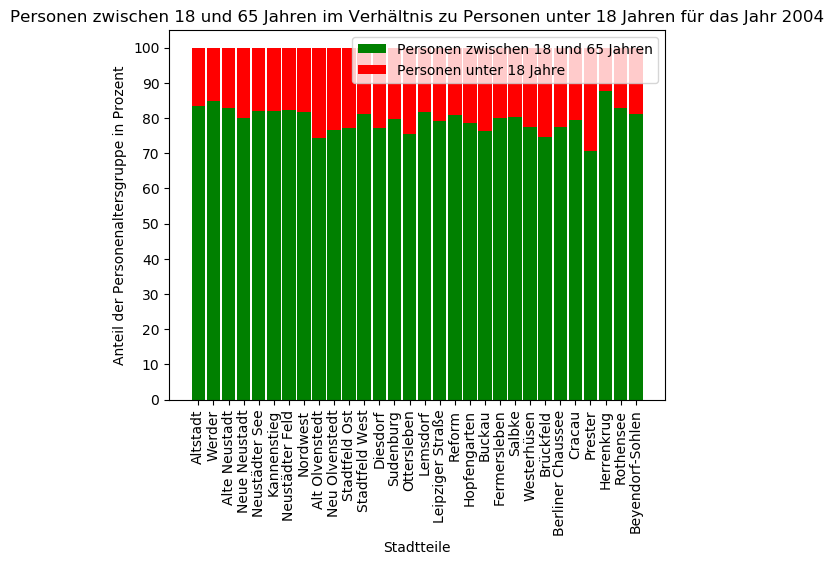

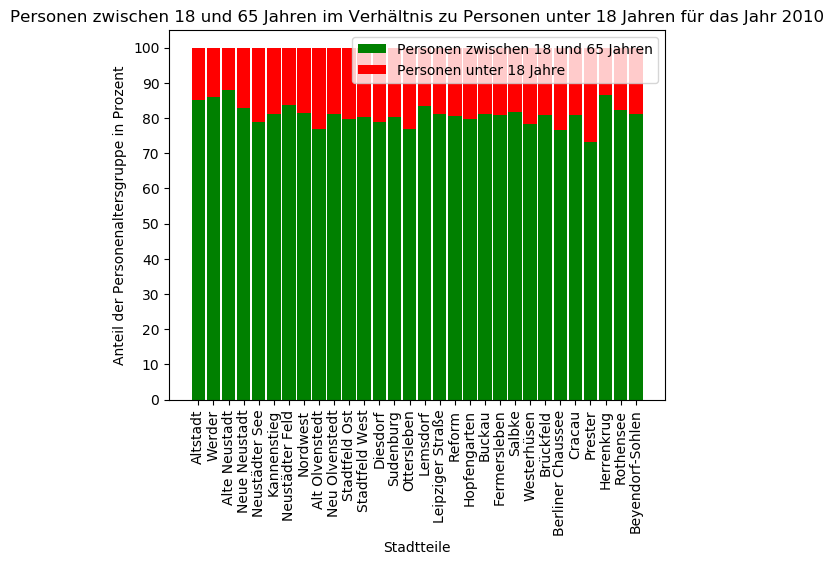

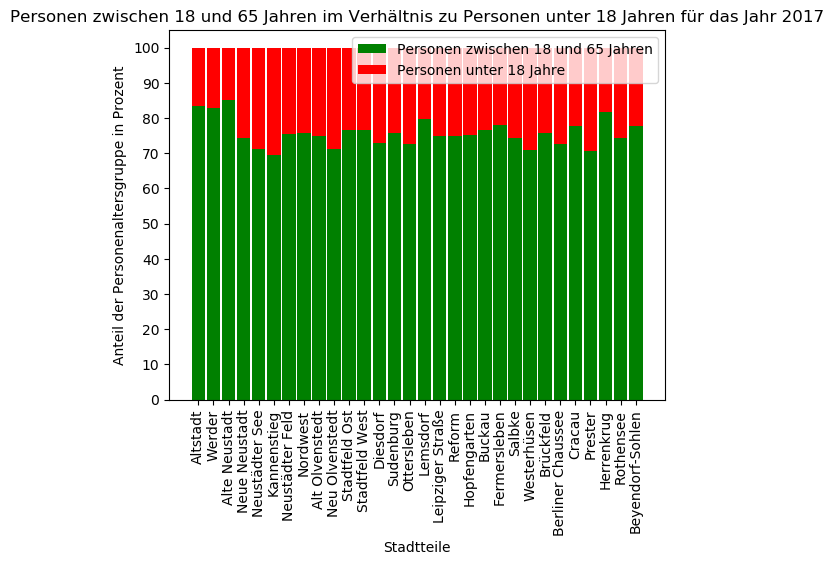

In [5]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# Variablen die für alle Grafiken gelten
#Ich verändere das DataFrame in eine list, welche ich in eine tulpe verwandle.
stadtteile = (tuple(list(magdeb007["STD_name"]))) 

# Balkendiagramm für das Verhältnis Personen über 65 Jahren
# für 2004
y_pos = np.arange(len(stadtteile))
MA_2004 = tuple(list(magdeb007["MAQ_V_JQ_2004"]))
J_2004 = tuple(list(magdeb007["JQ_2004"]))
balkBreit = 0.9 #Breite der Balken

# Die Balken erstellen
bar_ma = plt.bar(y_pos, MA_2004, balkBreit, color="green")
bar_j = plt.bar(y_pos, J_2004, balkBreit, bottom=MA_2004, color="red")
# Über das Argument bottom= lege ich fest, dass die Balken übereinander gestapelt werden sollen und welche Variable darunter
# liegen soll.

plt.xlabel('Stadtteile')
plt.ylabel('Anteil der Personenaltersgruppe in Prozent')
plt.title('Personen zwischen 18 und 65 Jahren im Verhältnis zu Personen unter 18 Jahren für das Jahr 2004')
plt.xticks(y_pos, stadtteile, rotation=90)
plt.yticks(np.arange(0, 101, 10))
plt.legend((bar_ma[0], bar_j[0]), ('Personen zwischen 18 und 65 Jahren', 'Personen unter 18 Jahre'))

plt.show()

# für 2010
y_pos = np.arange(len(stadtteile))
MA_2010 = tuple(list(magdeb007["MAQ_V_JQ_2010"]))
J_2010 = tuple(list(magdeb007["JQ_2010"]))
balkBreit = 0.9 #Breite der Balken

# Die Balken erstellen
bar_ma = plt.bar(y_pos, MA_2010, balkBreit, color="green")
bar_j = plt.bar(y_pos, J_2010, balkBreit, bottom=MA_2010, color="red")
# Über das Argument bottom= lege ich fest, dass die Balken übereinander gestapelt werden sollen und welche Variable darunter
# liegen soll.

plt.xlabel('Stadtteile')
plt.ylabel('Anteil der Personenaltersgruppe in Prozent')
plt.title('Personen zwischen 18 und 65 Jahren im Verhältnis zu Personen unter 18 Jahren für das Jahr 2010')
plt.xticks(y_pos, stadtteile, rotation=90)
plt.yticks(np.arange(0, 101, 10))
plt.legend((bar_ma[0], bar_j[0]), ('Personen zwischen 18 und 65 Jahren', 'Personen unter 18 Jahre'))

plt.show()

# für 2017
y_pos = np.arange(len(stadtteile))
MA_2017 = tuple(list(magdeb007["MAQ_V_JQ_2017"]))
J_2017 = tuple(list(magdeb007["JQ_2017"]))
balkBreit = 0.9 #Breite der Balken

# Die Balken erstellen
bar_ma = plt.bar(y_pos, MA_2017, balkBreit, color="green")
bar_j = plt.bar(y_pos, J_2017, balkBreit, bottom=MA_2017, color="red")
# Über das Argument bottom= lege ich fest, dass die Balken übereinander gestapelt werden sollen und welche Variable darunter
# liegen soll.

plt.xlabel('Stadtteile')
plt.ylabel('Anteil der Personenaltersgruppe in Prozent')
plt.title('Personen zwischen 18 und 65 Jahren im Verhältnis zu Personen unter 18 Jahren für das Jahr 2017')
plt.xticks(y_pos, stadtteile, rotation=90)
plt.yticks(np.arange(0, 101, 10))
plt.legend((bar_ma[0], bar_j[0]), ('Personen zwischen 18 und 65 Jahren', 'Personen unter 18 Jahre'))

plt.show()

#### 3.1.3 Stadtteile, die über oder unter dem Durchschnitt liegen

In [5]:
import math

# Kleines DataFram (stadtteile_AGE) bilden zur besserung Orientierung für die weiteren Berchnungen.
# Es werden nur die relevanten Varaibeln aufgenommen.
stadtteile_AGE = pd.DataFrame(magdeb007[["STD_name", "JQ_2004", "JQ_2010", "JQ_2017", "AQ_2004", "AQ_2010", "AQ_2017"]])

# Mittelwerte berechnen für die Altersklasse Personen unter 18 Jahre
JQ_Ges_Magdeb_2004 = round(np.mean(stadtteile_AGE["JQ_2004"]),2)
JQ_Ges_Magdeb_2010 = round(np.mean(stadtteile_AGE["JQ_2010"]),2)
JQ_Ges_Magdeb_2017 = round(np.mean(stadtteile_AGE["JQ_2017"]),2)

# Mittelwerte berechnen für die Altersklasse Personen über 65 Jahre
AQ_Ges_Magdeb_2004 = round(np.mean(stadtteile_AGE["AQ_2004"]),2)
AQ_Ges_Magdeb_2010 = round(np.mean(stadtteile_AGE["AQ_2010"]),2)
AQ_Ges_Magdeb_2017 = round(np.mean(stadtteile_AGE["AQ_2017"]),2)

# Standardabeichungen berechnen: Personen unter 18 Jahre
stadtteile_AGE["JQ_QAW_MW_2004"] = (stadtteile_AGE["JQ_2004"] - JQ_Ges_Magdeb_2004) ** 2
var_JQ_2004 = stadtteile_AGE["JQ_QAW_MW_2004"].sum() / len(stadtteile_AGE["JQ_QAW_MW_2004"])
sd_JQ_2004 = round(math.sqrt(var_JQ_2004),2)

stadtteile_AGE["JQ_QAW_MW_2010"] = (stadtteile_AGE["JQ_2010"] - JQ_Ges_Magdeb_2010) ** 2
var_JQ_2010 = stadtteile_AGE["JQ_QAW_MW_2010"].sum() / len(stadtteile_AGE["JQ_QAW_MW_2010"])
sd_JQ_2010 = round(math.sqrt(var_JQ_2010),2)

stadtteile_AGE["JQ_QAW_MW_2017"] = (stadtteile_AGE["JQ_2017"] - JQ_Ges_Magdeb_2017) ** 2
var_JQ_2017 = stadtteile_AGE["JQ_QAW_MW_2017"].sum() / len(stadtteile_AGE["JQ_QAW_MW_2017"])
sd_JQ_2017 = round(math.sqrt(var_JQ_2017),2)

print("Die Standardabweichung für die Quote Personen unter 18 Jahren 2004 beträgt: " + str(sd_JQ_2004))
print("Die Standardabweichung für die Quote Personen unter 18 Jahren 2010 beträgt: " + str(sd_JQ_2010))
print("Die Standardabweichung für die Quote Personen unter 18 Jahren 2017 beträgt: " + str(sd_JQ_2017))
print("")

# Standardabweichungen berechnen_ Personen über 65 Jahre
stadtteile_AGE["AQ_QAW_MW_2004"] = (stadtteile_AGE["AQ_2004"] - AQ_Ges_Magdeb_2004) ** 2
var_AQ_2004 = stadtteile_AGE["AQ_QAW_MW_2004"].sum() / len(stadtteile_AGE["AQ_QAW_MW_2004"])
sd_AQ_2004 = round(math.sqrt(var_AQ_2004),2)

stadtteile_AGE["AQ_QAW_MW_2010"] = (stadtteile_AGE["AQ_2010"] - AQ_Ges_Magdeb_2010) ** 2
var_AQ_2010 = stadtteile_AGE["AQ_QAW_MW_2010"].sum() / len(stadtteile_AGE["AQ_QAW_MW_2010"])
sd_AQ_2010 = round(math.sqrt(var_AQ_2010),2)

stadtteile_AGE["AQ_QAW_MW_2017"] = (stadtteile_AGE["AQ_2017"] - AQ_Ges_Magdeb_2017) ** 2
var_AQ_2017 = stadtteile_AGE["AQ_QAW_MW_2017"].sum() / len(stadtteile_AGE["AQ_QAW_MW_2017"])
sd_AQ_2017 = round(math.sqrt(var_AQ_2017),2)

print("Die Standardabweichung für die Quote Personen über 65 Jahren 2004 beträgt: " + str(sd_AQ_2004))
print("Die Standardabweichung für die Quote Personen über 65 Jahren 2010 beträgt: " + str(sd_AQ_2010))
print("Die Standardabweichung für die Quote Personen über 65 Jahren 2017 beträgt: " + str(sd_AQ_2017))

# Filter setzen: Es wird auf eine Standardabweichung gefiltert.
# _hight: Ein Standardabeichung über dem Mittelwert
# _low: Ein Standardabeichung unter dem Mittelwert

# Filter für Personen unter 18 Jahre
filter_JQ_2004_high = stadtteile_AGE["JQ_2004"] > (JQ_Ges_Magdeb_2004 + sd_JQ_2004)
filter_JQ_2004_low = stadtteile_AGE["JQ_2004"] < (JQ_Ges_Magdeb_2004 - sd_JQ_2004)
filter_JQ_2010_high = stadtteile_AGE["JQ_2010"] > (JQ_Ges_Magdeb_2010 + sd_JQ_2010)
filter_JQ_2010_low = stadtteile_AGE["JQ_2010"] < (JQ_Ges_Magdeb_2010 - sd_JQ_2010)
filter_JQ_2017_high = stadtteile_AGE["JQ_2017"] > (JQ_Ges_Magdeb_2017 + sd_JQ_2017)
filter_JQ_2017_low = stadtteile_AGE["JQ_2017"] < (JQ_Ges_Magdeb_2017 - sd_JQ_2017)

# Filter für Personen über 18 Jahre
filter_AQ_2004_high = stadtteile_AGE["AQ_2004"] > (AQ_Ges_Magdeb_2004 + sd_AQ_2004)
filter_AQ_2004_low = stadtteile_AGE["AQ_2004"] < (AQ_Ges_Magdeb_2004 - sd_AQ_2004)
filter_AQ_2010_high = stadtteile_AGE["AQ_2010"] > (AQ_Ges_Magdeb_2010 + sd_AQ_2010)
filter_AQ_2010_low = stadtteile_AGE["AQ_2010"] < (AQ_Ges_Magdeb_2010 - sd_AQ_2010)
filter_AQ_2017_high = stadtteile_AGE["AQ_2017"] > (AQ_Ges_Magdeb_2017 + sd_AQ_2017)
filter_AQ_2017_low = stadtteile_AGE["AQ_2017"] < (AQ_Ges_Magdeb_2017 - sd_AQ_2017)

print("")
print("")
print("JUGENDQUOTE")
print("")
print("Diese Stadtteile haben eine besonders HOHE Jugendquote.")
print("Im Jahr 2004 lagen folgende Stadtteile über einer Standardabweichung über dem Mittelwert innerhalb der Jugendquote (Mittelwert: " + str(JQ_Ges_Magdeb_2004) + "%, Standaradabweichung: " + str(sd_JQ_2004) + "%):")
print(stadtteile_AGE[["STD_name", "JQ_2004"]][filter_JQ_2004_high])
print("")
print("Im Jahr 2010 lagen folgende Stadtteile über einer Standardabweichung über dem Mittelwert innerhalb der Jugendquote (Mittelwert: " + str(JQ_Ges_Magdeb_2010) + "%, Standaradabweichung: " + str(sd_JQ_2010) + "%):")
print(stadtteile_AGE[["STD_name", "JQ_2010"]][filter_JQ_2010_high])
print("")
print("Im Jahr 2017 lagen folgende Stadtteile über einer Standardabweichung über dem Mittelwert innerhalb der Jugendquote (Mittelwert: " + str(JQ_Ges_Magdeb_2017) + "%, Standaradabweichung: " + str(sd_JQ_2017) + "%):")
print(stadtteile_AGE[["STD_name", "JQ_2017"]][filter_JQ_2017_high])

print("")

print("")
print("Diese Stadtteile haben eine besonders NIEDRIGE Jugendquote.")
print("Im Jahr 2004 lagen folgende Stadtteile unter einer Standardabweichung über dem Mittelwert innerhalb der Jugendquote (Mittelwert: " + str(JQ_Ges_Magdeb_2004) + "%, Standaradabweichung: " + str(sd_JQ_2004) + "%):")
print(stadtteile_AGE[["STD_name", "JQ_2004"]][filter_JQ_2004_low])
print("")
print("Im Jahr 2010 lagen folgende Stadtteile unter einer Standardabweichung über dem Mittelwert innerhalb der Jugendquote (Mittelwert: " + str(JQ_Ges_Magdeb_2010) + "%, Standaradabweichung: " + str(sd_JQ_2010) + "%):")
print(stadtteile_AGE[["STD_name", "JQ_2010"]][filter_JQ_2010_low])
print("")
print("Im Jahr 2017 lagen folgende Stadtteile unter einer Standardabweichung über dem Mittelwert innerhalb der Jugendquote (Mittelwert: " + str(JQ_Ges_Magdeb_2017) + "%, Standaradabweichung: " + str(sd_JQ_2017) + "%):")
print(stadtteile_AGE[["STD_name", "JQ_2017"]][filter_JQ_2017_low])

print("")
print("")
print("ALTENQUOTE")

print("")
print("Diese Stadtteile haben eine besonders HOHE Altenquote.")
print("Im Jahr 2004 lagen folgende Stadtteile über einer Standardabweichung über dem Mittelwert innerhalb der Altenquote (Mittelwert: " + str(AQ_Ges_Magdeb_2004) + "%, Standaradabweichung: " + str(sd_AQ_2004) + "%):")
print(stadtteile_AGE[["STD_name", "AQ_2004"]][filter_AQ_2004_high])
print("")
print("Im Jahr 2010 lagen folgende Stadtteile über einer Standardabweichung über dem Mittelwert innerhalb der Altenquote (Mittelwert: " + str(AQ_Ges_Magdeb_2010) + "%, Standaradabweichung: " + str(sd_AQ_2010) + "%):")
print(stadtteile_AGE[["STD_name", "AQ_2010"]][filter_AQ_2010_high])
print("")
print("Im Jahr 2017 lagen folgende Stadtteile über einer Standardabweichung über dem Mittelwert innerhalb der Altenquote (Mittelwert: " + str(AQ_Ges_Magdeb_2017) + "%, Standaradabweichung: " + str(sd_AQ_2017) + "%):")
print(stadtteile_AGE[["STD_name", "AQ_2017"]][filter_AQ_2017_high])

print("")

print("")
print("Diese Stadtteile haben eine besonders NIEDRIGE Altenquote.")
print("Im Jahr 2004 lagen folgende Stadtteile unter einer Standardabweichung über dem Mittelwert innerhalb der Altenquote (Mittelwert: " + str(AQ_Ges_Magdeb_2004) + "%, Standaradabweichung: " + str(sd_AQ_2004) + "%):")
print(stadtteile_AGE[["STD_name", "AQ_2004"]][filter_AQ_2004_low])
print("")
print("Im Jahr 2010 lagen folgende Stadtteile unter einer Standardabweichung über dem Mittelwert innerhalb der Altenquote (Mittelwert: " + str(AQ_Ges_Magdeb_2010) + "%, Standaradabweichung: " + str(sd_AQ_2010) + "%):")
print(stadtteile_AGE[["STD_name", "AQ_2010"]][filter_AQ_2010_low])
print("")
print("Im Jahr 2017 lagen folgende Stadtteile unter einer Standardabweichung über dem Mittelwert innerhalb der Altenquote (Mittelwert: " + str(AQ_Ges_Magdeb_2017) + "%, Standaradabweichung: " + str(sd_AQ_2017) + "%):")
print(stadtteile_AGE[["STD_name", "AQ_2017"]][filter_AQ_2017_low])

Die Standardabweichung für die Quote Personen unter 18 Jahren 2004 beträgt: 3.42
Die Standardabweichung für die Quote Personen unter 18 Jahren 2010 beträgt: 3.04
Die Standardabweichung für die Quote Personen unter 18 Jahren 2017 beträgt: 3.76

Die Standardabweichung für die Quote Personen über 65 Jahren 2004 beträgt: 9.5
Die Standardabweichung für die Quote Personen über 65 Jahren 2010 beträgt: 10.56
Die Standardabweichung für die Quote Personen über 65 Jahren 2017 beträgt: 13.57


JUGENDQUOTE

Diese Stadtteile haben eine besonders HOHE Jugendquote.
Im Jahr 2004 lagen folgende Stadtteile über einer Standardabweichung über dem Mittelwert innerhalb der Jugendquote (Mittelwert: 20.38%, Standaradabweichung: 3.42%):
          STD_name  JQ_2004
8   Alt Olvenstedt     25.7
14     Ottersleben     24.6
23       Brückfeld     25.3
26         Prester     29.3

Im Jahr 2010 lagen folgende Stadtteile über einer Standardabweichung über dem Mittelwert innerhalb der Jugendquote (Mittelwert: 19.02%, St

#### 3.1.4 Korrelation zwischen dem Durchschnittsalter und der Jugendquote (Personen unter 18 Jahren)

##### Berechnung der Korrelationen

In [7]:
# Die Quote der Personen unter 18 Jahren und das Durchschnittsalter für gesamt Magedeburg wurde von der Webseite entnommen:
# https://www.magdeburg.de/extern/statistik/stadtteilkatalog/atlas.html
# Die Quoten Personen unter 18 Jahren und Durchschnittsalter für gesamt Magedeburg werden in einem dictionary gespeichert.
# Zur Orrientierung wird noch die Jahreszahlen hinzugefügt.
verl_jung_DA_dic = {
    "Jahr":[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
    "verl_jung":[20.4, 19.5, 18.8, 18.5, 18.3, 18.5, 18.9, 19.4, 20.1, 20.7, 21.2, 21.9, 23.0, 23.9], 
    "verl_DA":[44.7, 44.9, 45.1, 45.3, 45.5, 45.6, 45.7, 45.7, 45.9, 45.4, 45.4, 45.2, 45.0, 45.1]
}

# Das Dictionary wird in ein DataFrame (df) umwandeln, um dann die DataFrame-Methode .corr() anwenden zu können
verl_jung_DA_df = pd.DataFrame(verl_jung_DA_dic)

# berechnen der Korrelation zwischen Quote Personen unter 18 Jahre und dem Durchschnittsalter im Zeitverlauf von 2004-2017
cor_jung_DA_verl = round(verl_jung_DA_df["verl_jung"].corr(verl_jung_DA_df["verl_DA"]), 2)
print("Die Korrelation für 2004-2017:")
print(cor_jung_DA_verl)
print("Die Korrelation ist mittelstark gegenläufig.")
print("Das heißt, mit dem Anstieg der Quote Personen über 65 Jahren ist das Durchschnittsalter gesunken.")
print("")
print("")

# Korrelationen zwischen Quote Personen unter 18 Jahre und Durchschnittsalter in den Stadtteilen
cor_AGE_Jung_04 = round(magdeb007["JQ_2004"].corr(magdeb007["DA_2004"]),2)
cor_AGE_Jung_10 = round(magdeb007["JQ_2010"].corr(magdeb007["DA_2010"]),2)
cor_AGE_Jung_17 = round(magdeb007["JQ_2017"].corr(magdeb007["DA_2017"]),2)

print("Für 2004:")
print(cor_AGE_Jung_04)
print("")
print("Für 2010:")
print(cor_AGE_Jung_10)
print("")
print("Für 2017")
print(cor_AGE_Jung_17)
print("")
print("Die Korrelation über die Stadtteile war zunächst stark gegenläufig, ist gesunken und ist zu einer gleichsinnigen Korrelation geworden.")
print("Das deutet darauf hin, dass sich die Personen unter 18 Jahren zunächst in bestimmten Stadtteilen konzentriert haben, über die Zeit sich jedoch eher gleichmäßig über die Stadtteile verteilt haben und am Ende keinen gegenläufigen Einfluss mehr auf das Durchschnittsalter ausüben konnten.")

Die Korrelation für 2004-2017:
-0.38
Die Korrelation ist mittelstark gegenläufig.
Das heißt, mit dem Anstieg der Quote Personen über 65 Jahren ist das Durchschnittsalter gesunken.


Für 2004:
-0.69

Für 2010:
-0.14

Für 2017
0.25

Die Korrelation über die Stadtteile war zunächst stark gegenläufig, ist gesunken und ist zu einer gleichsinnigen Korrelation geworden.
Das deutet darauf hin, dass sich die Personen unter 18 Jahren zunächst in bestimmten Stadtteilen konzentriert haben, über die Zeit sich jedoch eher gleichmäßig über die Stadtteile verteilt haben und am Ende keinen gegenläufigen Einfluss mehr auf das Durchschnittsalter ausüben konnten.


##### Grafische Darstellung der Korrelationen für das Durchschnittsalter

Korrelation Quote Personen unter 18 Jahre und Durchschnittsalter in der Zeit von 2004-2017: -0.38


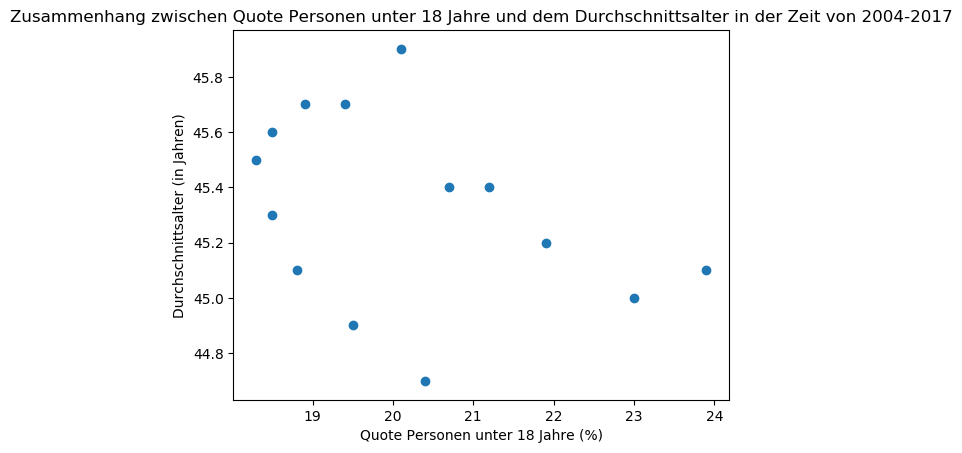


Korrelation Quote Personen unter 18 Jahre und Durchschnittsalter in den Stadtteilen für 2004: -0.69


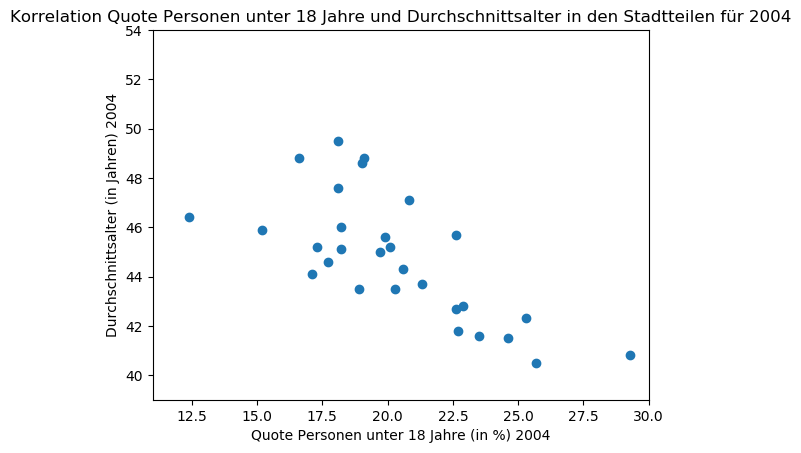


Korrelation Quote Personen unter 18 Jahre und Durchschnittsalter in den Stadtteilen für 2010: -0.14


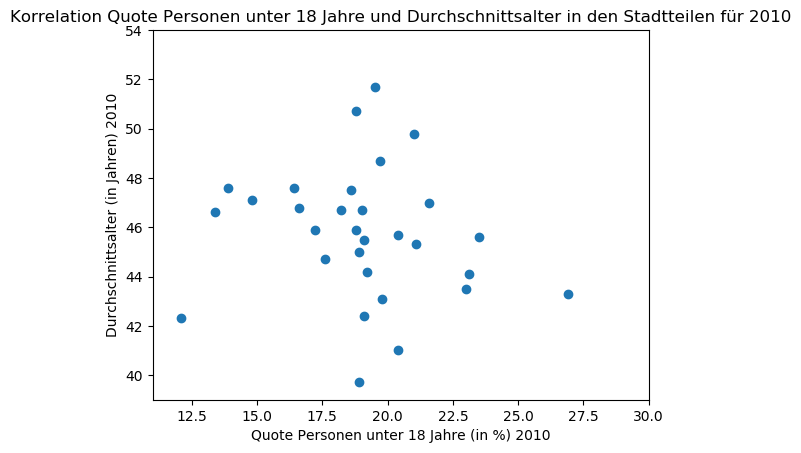


Korrelation Quote Personen unter 18 Jahre und Durchschnittsalter in den Stadtteilen für 2017: 0.25


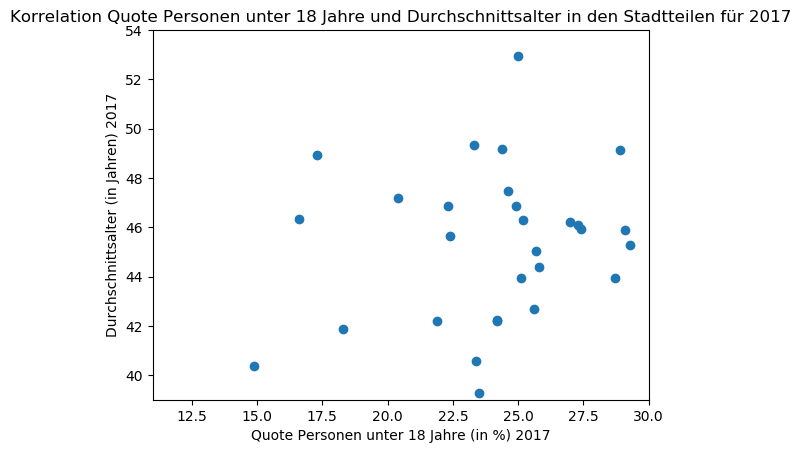

In [9]:
print ("Korrelation Quote Personen unter 18 Jahre und Durchschnittsalter in der Zeit von 2004-2017: " + str(cor_jung_DA_verl))
plt.scatter(verl_jung_DA_df["verl_jung"], verl_jung_DA_df["verl_DA"])
plt.xlabel('Quote Personen unter 18 Jahre (%)')
plt.ylabel('Durchschnittsalter (in Jahren)')
plt.title('Zusammenhang zwischen Quote Personen unter 18 Jahre und dem Durchschnittsalter in der Zeit von 2004-2017')
plt.show()
print("")

print ("Korrelation Quote Personen unter 18 Jahre und Durchschnittsalter in den Stadtteilen für 2004: " + str(cor_AGE_Jung_04))
plt.scatter(magdeb007["JQ_2004"], magdeb007["DA_2004"])
plt.xlim(11,30)
plt.ylim(39,54)
plt.xlabel('Quote Personen unter 18 Jahre (in %) 2004')
plt.ylabel('Durchschnittsalter (in Jahren) 2004')
plt.title('Korrelation Quote Personen unter 18 Jahre und Durchschnittsalter in den Stadtteilen für 2004')
plt.show()
print("")

print ("Korrelation Quote Personen unter 18 Jahre und Durchschnittsalter in den Stadtteilen für 2010: " + str(cor_AGE_Jung_10))
plt.scatter(magdeb007["JQ_2010"], magdeb007["DA_2010"])
plt.xlim(11,30)
plt.ylim(39,54)
plt.xlabel('Quote Personen unter 18 Jahre (in %) 2010')
plt.ylabel('Durchschnittsalter (in Jahren) 2010')
plt.title('Korrelation Quote Personen unter 18 Jahre und Durchschnittsalter in den Stadtteilen für 2010')
plt.show()
print("")

print ("Korrelation Quote Personen unter 18 Jahre und Durchschnittsalter in den Stadtteilen für 2017: " + str(cor_AGE_Jung_17))
plt.scatter(magdeb007["JQ_2017"], magdeb007["DA_2017"])
plt.xlim(11,30)
plt.ylim(39,54)
plt.xlabel('Quote Personen unter 18 Jahre (in %) 2017')
plt.ylabel('Durchschnittsalter (in Jahren) 2017')
plt.title('Korrelation Quote Personen unter 18 Jahre und Durchschnittsalter in den Stadtteilen für 2017')
plt.show()
print("")

### 3.2 Ethnische Zusammensetzung

#### Ziele:
1. Anteil der Ausländischen Bevölkerung für gesamt Magdeburg zu den Zeitpunkten 2004, 2010 und 2017
2. Ethnischer Segregationsindex für die Zeitpunkte 2004, 2010 und 2017
3. Verteilung der Ausländischen Bevölkerung in den Stadtteilen für die Zeitpunkte 2004, 2010 und 2017
4. Korrelation zwischen dem Anteil der Ausländischen Bevölkerung und dem Durchschnittsalter

#### 3.2.1 Anteile der Ausländischen Bevölkerung in den Jahren 2004, 2010 und 2017 für gesamt Magedeburg

Da die Daten der Ausländischen Bevölkerung ('ABEV') in absoluten Zahlen angegeben sind, müssen diese erst als Prozentzahl von der Gesamtbevölkerung berechnet werden.
Da außerdem die Ausländische Bevölkerung (ABEV) pro Stadtteil angegeben ist, muss zuerst die Gesamtzahl pro Jahr berechnet werden. Dazu werden alle Daten pro Stadtteil pro Jahr addiert und dann der Anteil an der Gesamtbevölkerung berechnet. 

In [10]:
#benötigte Variablen sind: ABEV_2004, ABEV_2010 und ABEV_2017 sowie EW_2004, EW_2010 und EW_2017

#Auswählen der Spalte 'EW_2004'
print(magdeb007['EW_2004'])

#Addieren der Werte und speichern in der neuen Variable sumEW_2004
sumEW_2004 = sum(magdeb007['EW_2004'])

print("Die Gesamteinwohnerzahl beträgt 2004: " + str(sumEW_2004))

#das Gleiche für die Variable ABEV_2004, also die Ausländische Bevölkerung im Jahr 2004
sumABEV_2004 = sum(magdeb007['ABEV_2004'])

print("Die Anzahl der Ausländischen Bevölkerung beträgt 2004: " + str(sumABEV_2004))

#jetzt soll der Anteil der Ausländischen Bevölkerung im Jahr 2004 ausgerechnet werden
anteilABEV_2004 = (sumABEV_2004/sumEW_2004)*100

print('Der Anteil der Ausländischen Bevölkerung im Jahr 2004 beträgt: '+ str(anteilABEV_2004))
anteilABEV_2004_round = round (anteilABEV_2004, 1)

print('Der Anteil auf die erste Stelle hinter dem Komma gerundet lautet:')
print(anteilABEV_2004_round)


0     12786
1      2490
2      9050
3     13572
4     11902
5      6877
6      9828
7      4547
8      3945
9     14257
10    22225
11    14367
12     3418
13    16549
14     9795
15     2050
16    13981
17    14086
18     4528
19     4340
20     3108
21     3999
22     3121
23     3019
24     2134
25     8402
26     1891
27      913
28     2727
29     1232
Name: EW_2004, dtype: int64
Die Gesamteinwohnerzahl beträgt 2004: 225139
Die Anzahl der Ausländischen Bevölkerung beträgt 2004: 8092
Der Anteil der Ausländischen Bevölkerung im Jahr 2004 beträgt: 3.5942240127210296
Der Anteil auf die erste Stelle hinter dem Komma gerundet lautet:
3.6


In [11]:
#die gleiche Berechnung führen wir jetzt für die Zeitpunkte 2010 und 2017 durch. Zuerst für das Jahr 2010:
sumEW_2010 = sum(magdeb007['EW_2010'])

print("Die Gesamteinwohnerzahl beträgt im Jahr 2010: " + str(sumEW_2010))

sumABEV_2010 = sum(magdeb007['ABEV_2010'])
print("Die Anzahl der Ausländischen Bevölkerung im Jahr 2010 beträgt: " + str(sumABEV_2010))

anteilABEV_2010 = (sumABEV_2010/sumEW_2010)*100

print("Der Anteil Ausländischen Bevölkerung beträgt 2010: " + str(anteilABEV_2010))
anteilABEV_2010_round = round (anteilABEV_2010, 1)

print("Der Anteil auf die erste Stelle hinter dem Komma gerundet beträgt: ")
print(anteilABEV_2010_round)

#jetzt noch für das Jahr 2017

sumEW_2017 = sum(magdeb007['EW_2017'])

print("Die Gesamteinwohnerzahl beträgt im Jahr 2017: " + str(sumEW_2017))

sumABEV_2017 = sum(magdeb007['ABEV_2017'])
print("Die Anzahl der Ausländischen Bevölkerung im Jahr 2017 beträgt: " + str(sumABEV_2017))

anteilABEV_2017 = (sumABEV_2017/sumEW_2017)*100

print("Der Anteil der Ausländischen Bevölkerung beträgt 2017: " + str(anteilABEV_2017))
anteilABEV_2017_round = round (anteilABEV_2017, 1)

print("Der Anteil auf die erste Stelle hinter dem Komma gerundet beträgt: ")
print(anteilABEV_2017_round)

Die Gesamteinwohnerzahl beträgt im Jahr 2010: 229705
Die Anzahl der Ausländischen Bevölkerung im Jahr 2010 beträgt: 8153
Der Anteil Ausländischen Bevölkerung beträgt 2010: 3.5493350166517925
Der Anteil auf die erste Stelle hinter dem Komma gerundet beträgt: 
3.5
Die Gesamteinwohnerzahl beträgt im Jahr 2017: 240298
Die Anzahl der Ausländischen Bevölkerung im Jahr 2017 beträgt: 20636
Der Anteil der Ausländischen Bevölkerung beträgt 2017: 8.58767030936587
Der Anteil auf die erste Stelle hinter dem Komma gerundet beträgt: 
8.6


#### 3.2.2 Segregationsindex für die Ausländische Bevölkerung in den Jahren 2004, 2010 und 2017

Nun wird der Segregationsindex für die Jahre 2004, 2010 und 2017 exemplarisch berechnet.


In [12]:
#für 2004:
sum_ABEV_2004 = magdeb007['ABEV_2004'].sum()
sum_EW_2004 = magdeb007['EW_2004'].sum()
print ("Auch die alternative Berechnung mittels Summenformel resultiert in den gleichen Ergebnissen: "
       +str(sum_ABEV_2004)+ "," + str(sum_EW_2004) )

#Anteile berechnen
magdeb007['anteilABEV_2004'] = magdeb007['ABEV_2004']/sum_ABEV_2004
magdeb007['anteilnichtABEV_2004'] = (magdeb007['EW_2004'] - magdeb007['ABEV_2004']) / (sum_EW_2004 - sum_ABEV_2004)
print(magdeb007)

#Verhältnis von ABEV_2004 zur Einwohnerzahl mithilfe der abs() Funktion berechnen
magdeb007['verh_ABEV_zu_EW_2004'] = abs(magdeb007['anteilABEV_2004']- magdeb007['anteilnichtABEV_2004'])
print(magdeb007)

#Segregationsindex berechnen
segIndex_04 = 0.5 * magdeb007['verh_ABEV_zu_EW_2004'].sum()
print('Der Segregationsindex beträgt: ' + str(segIndex_04))

Auch die alternative Berechnung mittels Summenformel resultiert in den gleichen Ergebnissen: 8092,225139
    STD_NR           STD_name  EW_2004  EW_2005  EW_2006  EW_2007  EW_2008  \
0        1           Altstadt    12786    13580    13892    14140    14532   
1        2             Werder     2490     2594     2691     2663     2709   
2        4      Alte Neustadt     9050     9183     9347     9534     9641   
3        6      Neue Neustadt    13572    13566    13583    13631    13757   
4        8     Neustädter See    11902    11784    11829    11784    11557   
5       10        Kannenstieg     6877     6735     6676     6594     6383   
6       12    Neustädter Feld     9828    10011     9980     9946     9847   
7       18           Nordwest     4547     4511     4522     4544     4609   
8       20     Alt Olvenstedt     3945     4111     4262     4278     4199   
9       22     Neu Olvenstedt    14257    13488    12733    12017    11741   
10      24      Stadtfeld Ost    2222

In [13]:
#für 2010:
sum_ABEV_2010 = magdeb007['ABEV_2010'].sum()
sum_EW_2010 = magdeb007['EW_2010'].sum()
print ("Auch die alternative Berechnung mittels Summenformel resultiert in den gleichen Ergebnissen: "
       +str(sum_ABEV_2010)+ "," + str(sum_EW_2010) )

#Anteile berechnen
magdeb007['anteilABEV_2010'] = magdeb007['ABEV_2010']/sum_ABEV_2010
magdeb007['anteilnichtABEV_2010'] = (magdeb007['EW_2010'] - magdeb007['ABEV_2010']) / (sum_EW_2010 - sum_ABEV_2010)
print(magdeb007)

#Verhältnis von ABEV_2010 zur Einwohnerzahl mithilfe der abs() Funktion berechnen
magdeb007['verh_ABEV_zu_EW_2010'] = abs(magdeb007['anteilABEV_2010']- magdeb007['anteilnichtABEV_2010'])
print(magdeb007)

#Segregationsindex berechnen
segIndex_10 = 0.5 * magdeb007['verh_ABEV_zu_EW_2010'].sum()
print('Der Segregationsindex beträgt: ' + str(segIndex_10))

Auch die alternative Berechnung mittels Summenformel resultiert in den gleichen Ergebnissen: 8153,229705
    STD_NR           STD_name  EW_2004  EW_2005  EW_2006  EW_2007  EW_2008  \
0        1           Altstadt    12786    13580    13892    14140    14532   
1        2             Werder     2490     2594     2691     2663     2709   
2        4      Alte Neustadt     9050     9183     9347     9534     9641   
3        6      Neue Neustadt    13572    13566    13583    13631    13757   
4        8     Neustädter See    11902    11784    11829    11784    11557   
5       10        Kannenstieg     6877     6735     6676     6594     6383   
6       12    Neustädter Feld     9828    10011     9980     9946     9847   
7       18           Nordwest     4547     4511     4522     4544     4609   
8       20     Alt Olvenstedt     3945     4111     4262     4278     4199   
9       22     Neu Olvenstedt    14257    13488    12733    12017    11741   
10      24      Stadtfeld Ost    2222

In [14]:
#für 2017:
sum_ABEV_2017 = magdeb007['ABEV_2017'].sum()
sum_EW_2017 = magdeb007['EW_2017'].sum()
print ("Auch die alternative Berechnung mittels Summenformel resultiert in den gleichen Ergebnissen: "
       +str(sum_ABEV_2017)+ "," + str(sum_EW_2017) )

#Anteile berechnen
magdeb007['anteilABEV_2017'] = magdeb007['ABEV_2017']/sum_ABEV_2017
magdeb007['anteilnichtABEV_2017'] = (magdeb007['EW_2017'] - magdeb007['ABEV_2017']) / (sum_EW_2017 - sum_ABEV_2017)
print(magdeb007)

#Verhältnis von ABEV_2017 zur Einwohnerzahl mithilfe der abs() Funktion berechnen
magdeb007['verh_ABEV_zu_EW_2017'] = abs(magdeb007['anteilABEV_2017']- magdeb007['anteilnichtABEV_2017'])
print(magdeb007)

#Segregationsindex berechnen
segIndex_17 = 0.5 * magdeb007['verh_ABEV_zu_EW_2017'].sum()
print('Der Segregationsindex beträgt: ' + str(segIndex_17))

Auch die alternative Berechnung mittels Summenformel resultiert in den gleichen Ergebnissen: 20636,240298
    STD_NR           STD_name  EW_2004  EW_2005  EW_2006  EW_2007  EW_2008  \
0        1           Altstadt    12786    13580    13892    14140    14532   
1        2             Werder     2490     2594     2691     2663     2709   
2        4      Alte Neustadt     9050     9183     9347     9534     9641   
3        6      Neue Neustadt    13572    13566    13583    13631    13757   
4        8     Neustädter See    11902    11784    11829    11784    11557   
5       10        Kannenstieg     6877     6735     6676     6594     6383   
6       12    Neustädter Feld     9828    10011     9980     9946     9847   
7       18           Nordwest     4547     4511     4522     4544     4609   
8       20     Alt Olvenstedt     3945     4111     4262     4278     4199   
9       22     Neu Olvenstedt    14257    13488    12733    12017    11741   
10      24      Stadtfeld Ost    222

#### 3.2.3 Verteilung der Anzahl der Ausländischen Bevölkerung in den Stadtteilen

Um die berechneten Segregationsindizes besser beurteilen zu können, ist es interessant sich die Anzahl der Ausländischen Bevölkerung in den jeweiligen Stadtteilen im Verlauf der Jahre von 2004-2017 anzeigen zu lassen. Dazu werden Diagramme für die Jahre 2004,2010,2014,2015 und 2017 erstellt.

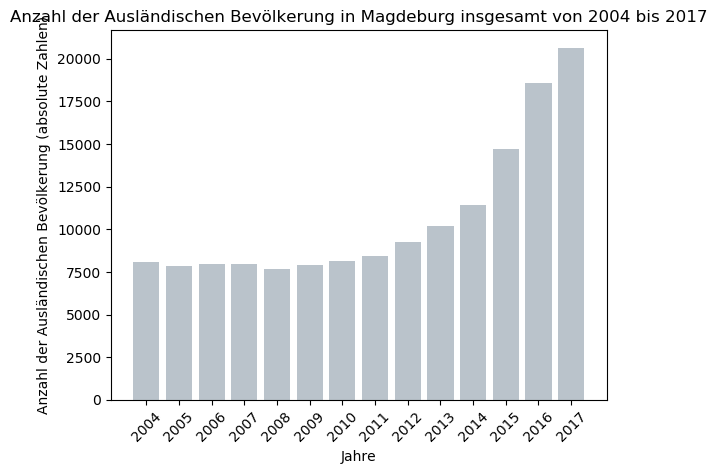

In [15]:
ABEV04bis17 = (sum(magdeb007['ABEV_2004']), 
                    sum(magdeb007['ABEV_2005']),
                    sum(magdeb007['ABEV_2006']),
                    sum(magdeb007['ABEV_2007']),
                    sum(magdeb007['ABEV_2008']),
                    sum(magdeb007['ABEV_2009']),
                    sum(magdeb007['ABEV_2010']),
                    sum(magdeb007['ABEV_2011']),
                    sum(magdeb007['ABEV_2012']),
                    sum(magdeb007['ABEV_2013']),
                    sum(magdeb007['ABEV_2014']),
                    sum(magdeb007['ABEV_2015']),
                    sum(magdeb007['ABEV_2016']),
                    sum(magdeb007['ABEV_2017']))

jahre = ('2004', '2005', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017')
y_pos = np.arange(len(jahre))

plt.bar(y_pos, ABEV04bis17, align='center', alpha=0.5, color='LightSlateGray')
plt.xticks(y_pos, jahre, rotation=45)
plt.ylabel('Anzahl der Ausländischen Bevölkerung (absolute Zahlen)')
plt.xlabel('Jahre')
plt.title('Anzahl der Ausländischen Bevölkerung in Magdeburg insgesamt von 2004 bis 2017')

plt.show()

In dem Diagramm ist abzulesen, dass es ab 2012 einen Anstieg der Ausländischen Bevölkerung in Magdeburg gab. Dies haben auch schon die Berechnungen der Anteile zuvor deutlich gemacht. Nun ist es interesant zu beobachten, wo sich dieser Anstieg geografisch in Magdeburg verordnet.

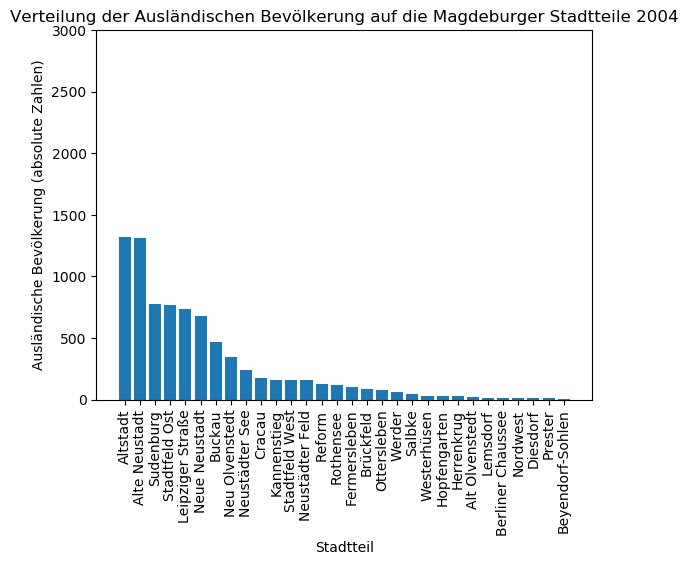

In [16]:
plt.bar(range(len(magdeb007)), magdeb007.sort_values('ABEV_2004',ascending=False)['ABEV_2004']) 
plt.xticks(range(len(magdeb007)), magdeb007.sort_values('ABEV_2004',ascending=False)['STD_name'], rotation=90)
plt.ylim((0,3000))
plt.title('Verteilung der Ausländischen Bevölkerung auf die Magdeburger Stadtteile 2004') 
plt.xlabel('Stadtteil') 
plt.ylabel('Ausländische Bevölkerung (absolute Zahlen)') 
plt.show() 

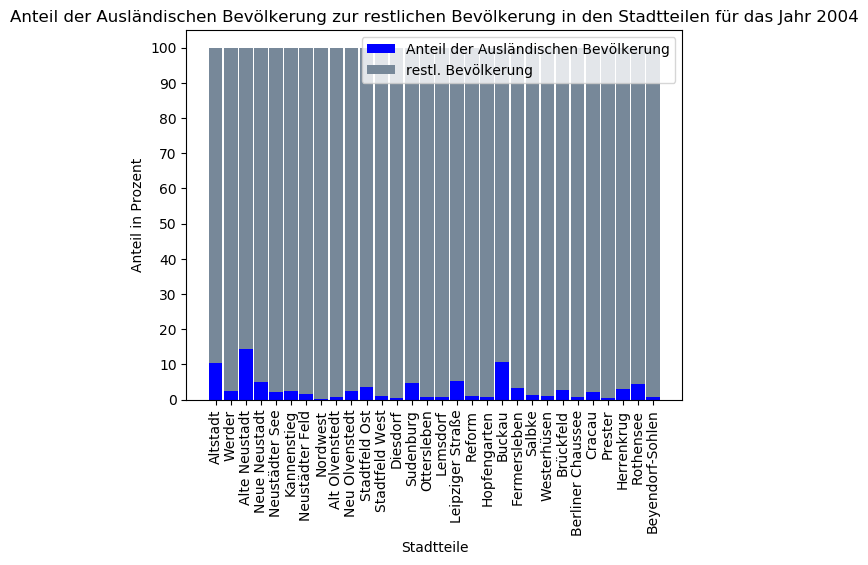

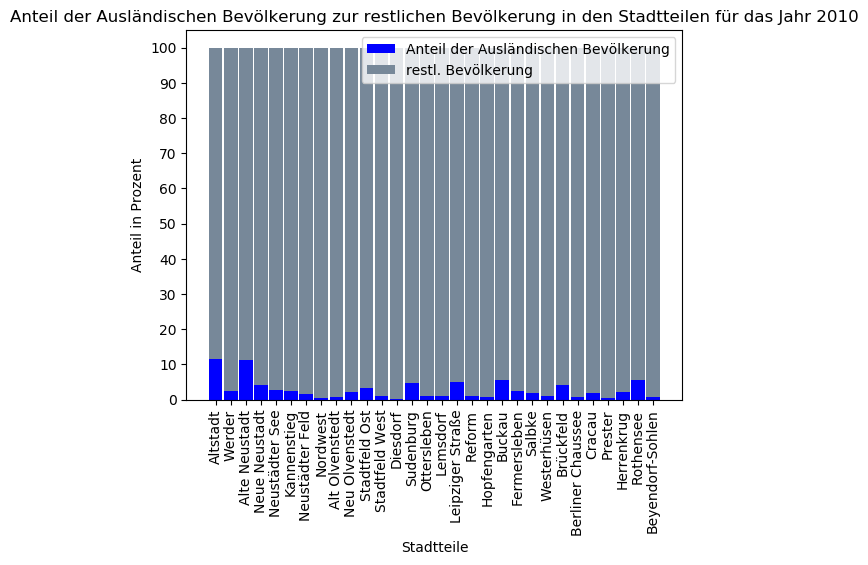

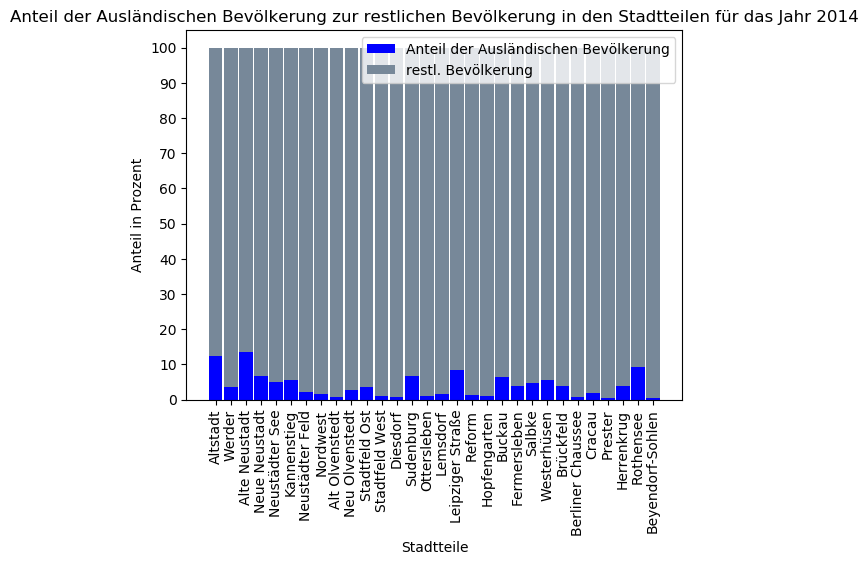

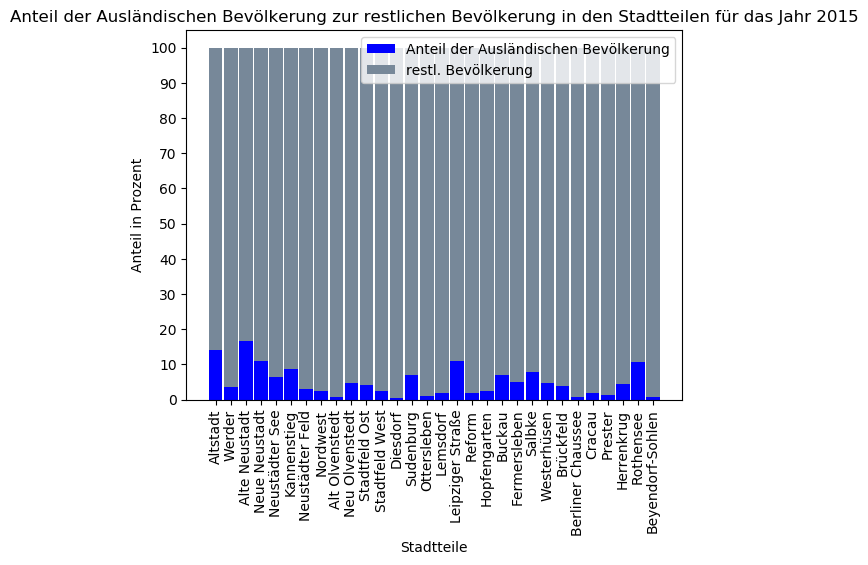

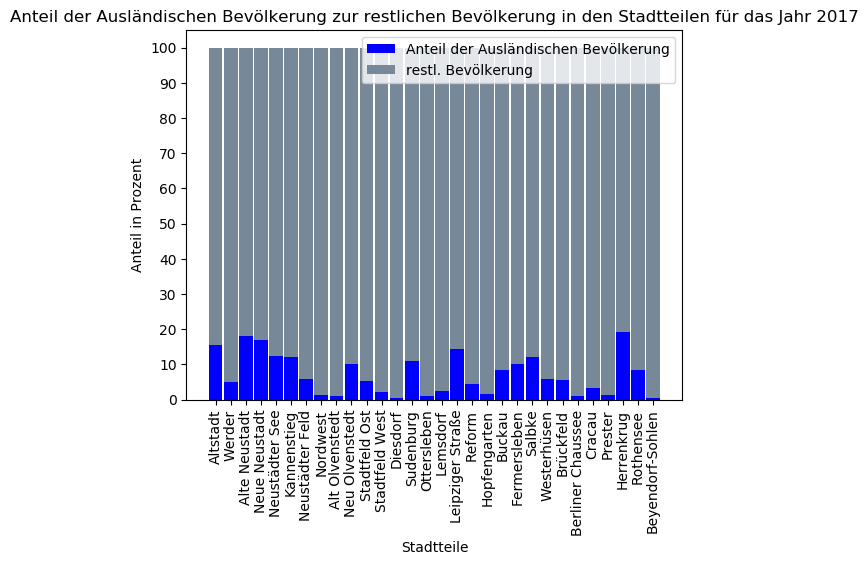

In [17]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


# Variablen die für alle Grafiken gelten
#Ich verändere das DataFrame in eine list, welche ich in eine tulpe verwandle.
stadtteile = (tuple(list(magdeb007["STD_name"]))) 


#Grafik für 2004 erstellen
magdeb007['rel_ABEV2004'] = (magdeb007['ABEV_2004']/magdeb007['EW_2004'])*100
magdeb007['rel_nichtABEV2004']= 100 - magdeb007['rel_ABEV2004']
# Balkendiagramm für das Verhältnis vom prozentualen Anteil der Ausländischen Bevölkerung zur restilichen Bevölkerung
# für 2004
y_pos = np.arange(len(stadtteile))

ABEV_2004 = tuple(list(magdeb007['rel_ABEV2004']))
nichtABEV_2004 = tuple(list(magdeb007["rel_nichtABEV2004"]))
balkBreit = 0.9 #Breite der Balken

# Die Balken erstellen
bar_ma = plt.bar(y_pos, ABEV_2004, balkBreit, color="Blue")
bar_j = plt.bar(y_pos, nichtABEV_2004, balkBreit, bottom= ABEV_2004, color="LightSlateGray")
# Über das Argument bottom= lege ich fest, dass die Balken übereinander gestapelt werden sollen und welche Variable darunter
# liegen soll.

plt.xlabel('Stadtteile')
plt.ylabel('Anteil in Prozent')
plt.title('Anteil der Ausländischen Bevölkerung zur restlichen Bevölkerung in den Stadtteilen für das Jahr 2004')
plt.xticks(y_pos, stadtteile, rotation=90)
plt.yticks(np.arange(0, 101, 10))
plt.legend((bar_ma[0], bar_j[0]), ('Anteil der Ausländischen Bevölkerung', 'restl. Bevölkerung'))

plt.show()

#Grafik für 2010
magdeb007['rel_ABEV2010'] = (magdeb007['ABEV_2010']/magdeb007['EW_2010'])*100
magdeb007['rel_nichtABEV2010']= 100 - magdeb007['rel_ABEV2010']
# Balkendiagramm für das Verhältnis vom prozentualen Anteil der Ausländischen Bevölkerung zur restilichen Bevölkerung
# für 2010
y_pos = np.arange(len(stadtteile))

ABEV_2010 = tuple(list(magdeb007['rel_ABEV2010']))
nichtABEV_2010 = tuple(list(magdeb007["rel_nichtABEV2010"]))
balkBreit = 0.9 #Breite der Balken

# Die Balken erstellen
bar_ma = plt.bar(y_pos, ABEV_2010, balkBreit, color="Blue")
bar_j = plt.bar(y_pos, nichtABEV_2010, balkBreit, bottom= ABEV_2010, color="LightSlateGray")
# Über das Argument bottom= lege ich fest, dass die Balken übereinander gestapelt werden sollen und welche Variable darunter
# liegen soll.

plt.xlabel('Stadtteile')
plt.ylabel('Anteil in Prozent')
plt.title('Anteil der Ausländischen Bevölkerung zur restlichen Bevölkerung in den Stadtteilen für das Jahr 2010')
plt.xticks(y_pos, stadtteile, rotation=90)
plt.yticks(np.arange(0, 101, 10))
plt.legend((bar_ma[0], bar_j[0]), ('Anteil der Ausländischen Bevölkerung', 'restl. Bevölkerung'))

plt.show()


#Grafik für 2014
magdeb007['rel_ABEV2014'] = (magdeb007['ABEV_2014']/magdeb007['EW_2014'])*100
magdeb007['rel_nichtABEV2014']= 100 - magdeb007['rel_ABEV2014']
# Balkendiagramm für das Verhältnis vom prozentualen Anteil der Ausländischen Bevölkerung zur restilichen Bevölkerung
# für 2014
y_pos = np.arange(len(stadtteile))

ABEV_2014 = tuple(list(magdeb007['rel_ABEV2014']))
nichtABEV_2014 = tuple(list(magdeb007["rel_nichtABEV2014"]))
balkBreit = 0.9 #Breite der Balken

# Die Balken erstellen
bar_ma = plt.bar(y_pos, ABEV_2014, balkBreit, color="Blue")
bar_j = plt.bar(y_pos, nichtABEV_2014, balkBreit, bottom= ABEV_2014, color="LightSlateGray")
# Über das Argument bottom= lege ich fest, dass die Balken übereinander gestapelt werden sollen und welche Variable darunter
# liegen soll.

plt.xlabel('Stadtteile')
plt.ylabel('Anteil in Prozent')
plt.title('Anteil der Ausländischen Bevölkerung zur restlichen Bevölkerung in den Stadtteilen für das Jahr 2014')
plt.xticks(y_pos, stadtteile, rotation=90)
plt.yticks(np.arange(0, 101, 10))
plt.legend((bar_ma[0], bar_j[0]), ('Anteil der Ausländischen Bevölkerung', 'restl. Bevölkerung'))

plt.show()

#Grafik für 2015
magdeb007['rel_ABEV2015'] = (magdeb007['ABEV_2015']/magdeb007['EW_2015'])*100
magdeb007['rel_nichtABEV2015']= 100 - magdeb007['rel_ABEV2015']
# Balkendiagramm für das Verhältnis vom prozentualen Anteil der Ausländischen Bevölkerung zur restilichen Bevölkerung
# für 2015
y_pos = np.arange(len(stadtteile))

ABEV_2015 = tuple(list(magdeb007['rel_ABEV2015']))
nichtABEV_2015 = tuple(list(magdeb007["rel_nichtABEV2015"]))
balkBreit = 0.9 #Breite der Balken

# Die Balken erstellen
bar_ma = plt.bar(y_pos, ABEV_2015, balkBreit, color="Blue")
bar_j = plt.bar(y_pos, nichtABEV_2015, balkBreit, bottom= ABEV_2015, color="LightSlateGray")
# Über das Argument bottom= lege ich fest, dass die Balken übereinander gestapelt werden sollen und welche Variable darunter
# liegen soll.

plt.xlabel('Stadtteile')
plt.ylabel('Anteil in Prozent')
plt.title('Anteil der Ausländischen Bevölkerung zur restlichen Bevölkerung in den Stadtteilen für das Jahr 2015')
plt.xticks(y_pos, stadtteile, rotation=90)
plt.yticks(np.arange(0, 101, 10))
plt.legend((bar_ma[0], bar_j[0]), ('Anteil der Ausländischen Bevölkerung', 'restl. Bevölkerung'))

plt.show()

#Grafik für 2017
magdeb007['rel_ABEV2017'] = (magdeb007['ABEV_2017']/magdeb007['EW_2017'])*100
magdeb007['rel_nichtABEV2017']= 100 - magdeb007['rel_ABEV2017']
# Balkendiagramm für das Verhältnis vom prozentualen Anteil der Ausländischen Bevölkerung zur restilichen Bevölkerung
# für 2017
y_pos = np.arange(len(stadtteile))

ABEV_2017 = tuple(list(magdeb007['rel_ABEV2017']))
nichtABEV_2017 = tuple(list(magdeb007["rel_nichtABEV2017"]))
balkBreit = 0.9 #Breite der Balken

# Die Balken erstellen
bar_ma = plt.bar(y_pos, ABEV_2017, balkBreit, color="Blue")
bar_j = plt.bar(y_pos, nichtABEV_2017, balkBreit, bottom= ABEV_2017, color="LightSlateGray")
# Über das Argument bottom= lege ich fest, dass die Balken übereinander gestapelt werden sollen und welche Variable darunter
# liegen soll.

plt.xlabel('Stadtteile')
plt.ylabel('Anteil in Prozent')
plt.title('Anteil der Ausländischen Bevölkerung zur restlichen Bevölkerung in den Stadtteilen für das Jahr 2017')
plt.xticks(y_pos, stadtteile, rotation=90)
plt.yticks(np.arange(0, 101, 10))
plt.legend((bar_ma[0], bar_j[0]), ('Anteil der Ausländischen Bevölkerung', 'restl. Bevölkerung'))

plt.show()


Die Ausländische Bevölkerung verteilt sich nicht gleichmäßig in den Magdeburger Stadtteilen. Die größte Anzahl an Ausländischer Bevölkerung findet sich in den Stadtteilen Altstadt, Alte Neustadt und Sudenburg wieder. Ab 2015 kommt noch Stadtfeld Ost hinzu. 2017 ist die Anzahl an Ausländischer Bevölkerung in Stadtfeld Ost höher als in Sudenburg.

#### 3.2.4 Korrelation zwischen der Ausländischen Bevölkerung und dem Durchschnittsalter

In [18]:
import pandas as pd
magdeburg = pd.read_csv('MagdeburgBereinigterDatensatzVers007.csv', sep = ";", decimal=",")
magdeburg.head()

,STD_NR,STD_name,EW_2004,EW_2005,EW_2006,EW_2007,EW_2008,EW_2009,EW_2010,EW_2011,...,DA_2008,DA_2009,DA_2010,DA_2011,DA_2012,DA_2013,DA_2014,DA_2015,DA_2016,DA_2017
0,1,Altstadt,12786,13580,13892,14140,14532,14863,14982,15263,...,47.1,47.2,47.1,46.9,47.0,46.6,46.9,46.6,46.39,46.34
1,2,Werder,2490,2594,2691,2663,2709,2759,2893,2964,...,47.0,47.6,47.6,48.1,48.8,49.0,48.8,48.7,48.92,48.93
2,4,Alte Neustadt,9050,9183,9347,9534,9641,9794,10124,10321,...,42.9,42.6,42.3,42.1,41.9,41.2,40.8,40.0,40.07,40.36
3,6,Neue Neustadt,13572,13566,13583,13631,13757,13684,13674,13765,...,45.6,45.9,45.9,45.9,45.9,44.9,44.7,43.7,42.84,42.67
4,8,Neustädter See,11902,11784,11829,11784,11557,11608,11568,11529,...,49.8,50.1,49.8,49.8,50.1,49.7,50.0,50.0,49.14,49.13


In [19]:
magdeb007['corABEV04'] = magdeb007 ['ABEV_2004'] / magdeb007['EW_2004']
magdeb007['corABEV10'] = magdeb007 ['ABEV_2010'] / magdeb007['EW_2010']
magdeb007['corABEV17'] = magdeb007 ['ABEV_2017'] / magdeb007['EW_2017']
magdeb007.head()

,STD_NR,STD_name,EW_2004,EW_2005,EW_2006,EW_2007,EW_2008,EW_2009,EW_2010,EW_2011,...,rel_nichtABEV2010,rel_ABEV2014,rel_nichtABEV2014,rel_ABEV2015,rel_nichtABEV2015,rel_ABEV2017,rel_nichtABEV2017,corABEV04,corABEV10,corABEV17
0,1,Altstadt,12786,13580,13892,14140,14532,14863,14982,15263,...,88.392738,12.485826,87.514174,13.953923,86.046077,15.449213,84.550787,0.102925,0.116073,0.154492
1,2,Werder,2490,2594,2691,2663,2709,2759,2893,2964,...,97.442102,3.519256,96.480744,3.469722,96.530278,4.940711,95.059289,0.024498,0.025579,0.049407
2,4,Alte Neustadt,9050,9183,9347,9534,9641,9794,10124,10321,...,88.779139,13.596932,86.403068,16.592437,83.407563,17.934354,82.065646,0.144530,0.112209,0.179344
3,6,Neue Neustadt,13572,13566,13583,13631,13757,13684,13674,13765,...,95.780313,6.828117,93.171883,11.089752,88.910248,16.916815,83.083185,0.049808,0.042197,0.169168
4,8,Neustädter See,11902,11784,11829,11784,11557,11608,11568,11529,...,97.225104,4.976094,95.023906,6.456178,93.543822,12.337999,87.662001,0.020333,0.027749,0.123380


Der Korrelationskoeffizient beträgt:
-0.01


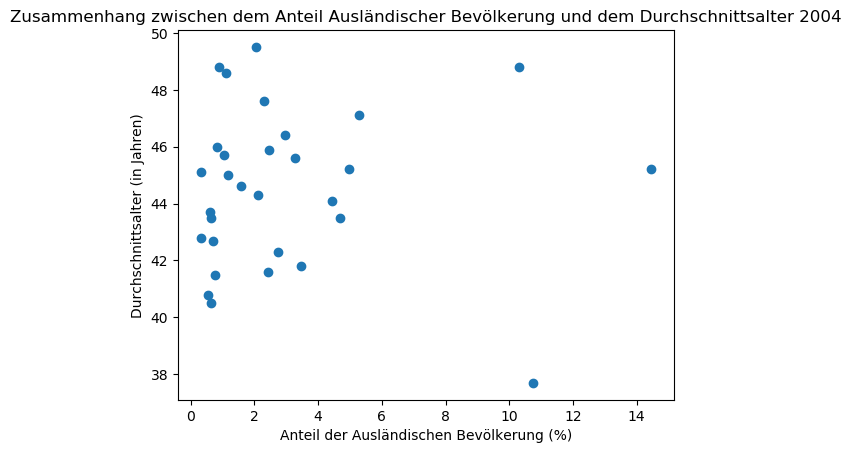

Der Korrelationskoeffizient beträgt:
-0.27


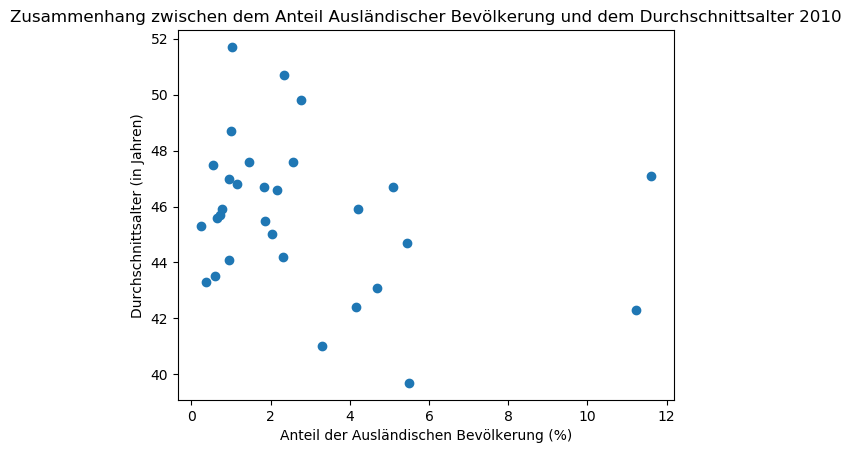

Der Korrelationskoeffizient beträgt:
-0.42


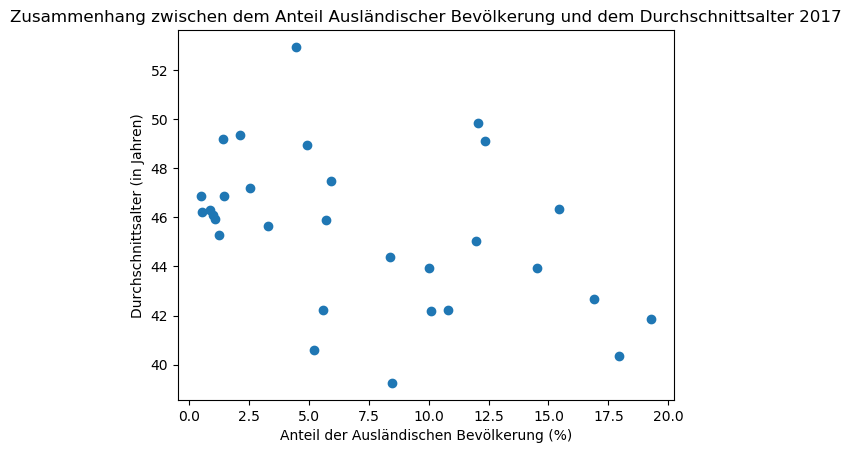

In [20]:
cor04 = magdeb007['corABEV04'].corr(magdeb007['DA_2004'])
print("Der Korrelationskoeffizient beträgt:")
print(round(cor04, 2))
plt.scatter(magdeb007['corABEV04']*100, magdeb007['DA_2004'])
plt.xlabel('Anteil der Ausländischen Bevölkerung (%)')
plt.ylabel('Durchschnittsalter (in Jahren)')
plt.title('Zusammenhang zwischen dem Anteil Ausländischer Bevölkerung und dem Durchschnittsalter 2004')
plt.show()

cor10 = magdeb007['corABEV10'].corr(magdeb007['DA_2010'])
print("Der Korrelationskoeffizient beträgt:")
print (round(cor10, 2))
plt.scatter(magdeb007['corABEV10']*100, magdeb007['DA_2010'])
plt.xlabel('Anteil der Ausländischen Bevölkerung (%)')
plt.ylabel('Durchschnittsalter (in Jahren)')
plt.title('Zusammenhang zwischen dem Anteil Ausländischer Bevölkerung und dem Durchschnittsalter 2010')
plt.show()

cor17 = magdeb007['corABEV17'].corr(magdeb007['DA_2017'])
print("Der Korrelationskoeffizient beträgt:")
print (round(cor17, 2))
plt.scatter(magdeb007['corABEV17']*100, magdeb007['DA_2017'])
plt.xlabel('Anteil der Ausländischen Bevölkerung (%)')
plt.ylabel('Durchschnittsalter (in Jahren)')
plt.title('Zusammenhang zwischen dem Anteil Ausländischer Bevölkerung und dem Durchschnittsalter 2017')
plt.show()

### 3.3 Geschlechtliche Zusammensetzung

#### Ziele:
1. Anteile der Männlichen und Weiblichen Bevölkerung für Gesamt Magedeburg zu den Zeitpunkten 2004, 2010 und 2017 berechnen.
2. Segregationsindex für die Weibliche und Männliche Bevölkerung in Magedeburg zu den Zeitpunkten 2004, 2010 und 2017. berechnen

#### 3.3.1 Anteile der männlichen und weiblichen Bevölkerung in Magdeburg

In [21]:
#für 2004
#Addieren der Werte von EW_2004 und speichern in der neuen Variable sumEW_2004
sumEW_2004 = sum(magdeb007['EW_2004'])

#das Gleiche für die Variable MBEV_2004
sumMBEV_2004 = sum(magdeb007['MBEV_2004'])

#jetzt soll der Anteil der Männlichen Bevölkerung im Jahr 2004 ausgerechnet werden
anteilMBEV_2004 = round(((sumMBEV_2004/sumEW_2004)*100),2)

print('Der Anteil der Männlichen Bevölkerung im Jahr 2004 in Prozent beträgt: '+ str(anteilMBEV_2004))
#Anteil der Weiblichen Bevölkerung entsprechend:
sumWBEV_2004 = sum(magdeb007['WBEV_2004'])
anteilWBEV_2004 = round(((sumWBEV_2004/sumEW_2004)*100),2)

print('Der Anteil der Weiblichen Bevölkerung im Jahr 2004 in Prozent beträgt: '+ str(anteilWBEV_2004))

Der Anteil der Männlichen Bevölkerung im Jahr 2004 in Prozent beträgt: 48.1
Der Anteil der Weiblichen Bevölkerung im Jahr 2004 in Prozent beträgt: 51.9


In [22]:
#Addieren der Werte von EW_2010 und speichern in der neuen Variable sumEW_2010
sumEW_2010 = sum(magdeb007['EW_2010'])

#das Gleiche für die Variable MBEV_2010
sumMBEV_2010 = sum(magdeb007['MBEV_2010'])

#jetzt soll der Anteil der Männlichen Bevölkerung im Jahr 2010 ausgerechnet werden
anteilMBEV_2010 = round(((sumMBEV_2010/sumEW_2010)*100),2)

print('Der Anteil der Männlichen Bevölkerung im Jahr 2010 in Prozent beträgt: '+ str(anteilMBEV_2010))
#Anteil der Weiblichen Bevölkerung entsprechend:
sumWBEV_2010 = sum(magdeb007['WBEV_2010'])
anteilWBEV_2010 = round(((sumWBEV_2010/sumEW_2010)*100),2)

print('Der Anteil der Weiblichen Bevölkerung im Jahr 2010 in Prozent beträgt: '+ str(anteilWBEV_2010))

Der Anteil der Männlichen Bevölkerung im Jahr 2010 in Prozent beträgt: 48.6
Der Anteil der Weiblichen Bevölkerung im Jahr 2010 in Prozent beträgt: 51.4


In [23]:
#Addieren der Werte von EW_2017 und speichern in der neuen Variable sumEW_2017
sumEW_2017 = sum(magdeb007['EW_2017'])

#das Gleiche für die Variable MBEV_2017
sumMBEV_2017 = sum(magdeb007['MBEV_2017'])

#jetzt soll der Anteil der Männlichen Bevölkerung im Jahr 2017 ausgerechnet werden
anteilMBEV_2017 = round(((sumMBEV_2017/sumEW_2017)*100),2)

print('Der Anteil der Männlichen Bevölkerung im Jahr 2017 in Prozent beträgt: '+ str(anteilMBEV_2017))
#Anteil der Weiblichen Bevölkerung entsprechend:
sumWBEV_2017 = sum(magdeb007['WBEV_2017'])
anteilWBEV_2017 = round(((sumWBEV_2017/sumEW_2017)*100),2)

print('Der Anteil der Weiblichen Bevölkerung im Jahr 2017 in Prozent beträgt: '+ str(anteilWBEV_2017))

Der Anteil der Männlichen Bevölkerung im Jahr 2017 in Prozent beträgt: 49.5
Der Anteil der Weiblichen Bevölkerung im Jahr 2017 in Prozent beträgt: 50.5


Der Anteil der Männlichen sowie Weiblichen Bevölkerung verändert sich nur minimal im Laufe der Jahre.

#### 3.3.2 Segregationsindex für die beiden Geschlechter für die Zeitpunkte 2004, 2010 und 2017

##### Segregation für die männliche Bevölkerung

In [24]:
#für 2004:
sum_MBEV_2004 = magdeb007['MBEV_2004'].sum()
sum_EW_2004 = magdeb007['EW_2004'].sum()

#Anteile berechnen
magdeb007['anteilMBEV_2004'] = magdeb007['MBEV_2004']/sum_MBEV_2004
magdeb007['anteilnichtMBEV_2004'] = (magdeb007['EW_2004'] - magdeb007['MBEV_2004']) / (sum_EW_2004 - sum_MBEV_2004)

#Verhältnis von ABEV_2004 zur Einwohnerzahl mithilfe der abs() Funktion berechnen
magdeb007['verh_MBEV_zu_EW_2004'] = abs(magdeb007['anteilMBEV_2004']- magdeb007['anteilnichtMBEV_2004'])

#Segregationsindex berechnen
segIndex_M2004 = round(0.5 * magdeb007['verh_MBEV_zu_EW_2004'].sum(),2)
print('Der Segregationsindex für Männer in 2004 beträgt: ' + str(segIndex_M2004))


#für 2010:
sum_MBEV_2010 = magdeb007['MBEV_2010'].sum()
sum_EW_2010 = magdeb007['EW_2010'].sum()

#Anteile berechnen
magdeb007['anteilMBEV_2010'] = magdeb007['MBEV_2010']/sum_MBEV_2010
magdeb007['anteilnichtMBEV_2010'] = (magdeb007['EW_2010'] - magdeb007['MBEV_2010']) / (sum_EW_2010 - sum_MBEV_2010)

#Verhältnis von ABEV_2010 zur Einwohnerzahl mithilfe der abs() Funktion berechnen
magdeb007['verh_MBEV_zu_EW_2010'] = abs(magdeb007['anteilMBEV_2010']- magdeb007['anteilnichtMBEV_2010'])

#Segregationsindex berechnen
segIndex_M2010 = round(0.5 * magdeb007['verh_MBEV_zu_EW_2010'].sum(),2)
print('Der Segregationsindex für Männer in 2010 beträgt: ' + str(segIndex_M2010))


#für 2017:
sum_MBEV_2017 = magdeb007['MBEV_2017'].sum()
sum_EW_2017 = magdeb007['EW_2017'].sum()

#Anteile berechnen
magdeb007['anteilMBEV_2017'] = magdeb007['MBEV_2017']/sum_MBEV_2017
magdeb007['anteilnichtMBEV_2017'] = (magdeb007['EW_2017'] - magdeb007['MBEV_2017']) / (sum_EW_2017 - sum_MBEV_2017)

#Verhältnis von ABEV_2017 zur Einwohnerzahl mithilfe der abs() Funktion berechnen
magdeb007['verh_MBEV_zu_EW_2017'] = abs(magdeb007['anteilMBEV_2017']- magdeb007['anteilnichtMBEV_2017'])

#Segregationsindex berechnen
segIndex_M2017 = round(0.5 * magdeb007['verh_MBEV_zu_EW_2017'].sum(),2)
print('Der Segregationsindex für Männer in 2017 beträgt: ' + str(segIndex_M2017))

Der Segregationsindex für Männer in 2004 beträgt: 0.02
Der Segregationsindex für Männer in 2010 beträgt: 0.02
Der Segregationsindex für Männer in 2017 beträgt: 0.03


##### Segregation für die weibliche Bevölkerung

In [25]:
#für 2004:
sum_WBEV_2004 = magdeb007['WBEV_2004'].sum()
sum_EW_2004 = magdeb007['EW_2004'].sum()

#Anteile berechnen
magdeb007['anteilWBEV_2004'] = magdeb007['WBEV_2004']/sum_WBEV_2004
magdeb007['anteilnichtWBEV_2004'] = (magdeb007['EW_2004'] - magdeb007['WBEV_2004']) / (sum_EW_2004 - sum_WBEV_2004)

#Verhältnis von ABEV_2004 zur Einwohnerzahl mithilfe der abs() Funktion berechnen
magdeb007['verh_WBEV_zu_EW_2004'] = abs(magdeb007['anteilWBEV_2004']- magdeb007['anteilnichtWBEV_2004'])

#Segregationsindex berechnen
segIndex_W2004 = round(0.5 * magdeb007['verh_WBEV_zu_EW_2004'].sum(),2)
print('Der Segregationsindex für Frauen in 2004 beträgt: ' + str(segIndex_W2004))


#für 2010:
sum_WBEV_2010 = magdeb007['WBEV_2010'].sum()
sum_EW_2010 = magdeb007['EW_2010'].sum()

#Anteile berechnen
magdeb007['anteilWBEV_2010'] = magdeb007['WBEV_2010']/sum_WBEV_2010
magdeb007['anteilnichtWBEV_2010'] = (magdeb007['EW_2010'] - magdeb007['WBEV_2010']) / (sum_EW_2010 - sum_WBEV_2010)

#Verhältnis von ABEV_2010 zur Einwohnerzahl mithilfe der abs() Funktion berechnen
magdeb007['verh_WBEV_zu_EW_2010'] = abs(magdeb007['anteilWBEV_2010']- magdeb007['anteilnichtWBEV_2010'])

#Segregationsindex berechnen
segIndex_W2010 = round(0.5 * magdeb007['verh_WBEV_zu_EW_2010'].sum(),2)
print('Der Segregationsindex für Frauen in 2010 beträgt: ' + str(segIndex_W2010))


#für 2017:
sum_WBEV_2017 = magdeb007['WBEV_2017'].sum()
sum_EW_2017 = magdeb007['EW_2017'].sum()

#Anteile berechnen
magdeb007['anteilWBEV_2017'] = magdeb007['WBEV_2017']/sum_WBEV_2017
magdeb007['anteilnichtWBEV_2017'] = (magdeb007['EW_2017'] - magdeb007['WBEV_2017']) / (sum_EW_2017 - sum_WBEV_2017)

#Verhältnis von ABEV_2017 zur Einwohnerzahl mithilfe der abs() Funktion berechnen
magdeb007['verh_WBEV_zu_EW_2017'] = abs(magdeb007['anteilWBEV_2017']- magdeb007['anteilnichtWBEV_2017'])

#Segregationsindex berechnen
segIndex_W2017 = round(0.5 * magdeb007['verh_WBEV_zu_EW_2017'].sum(),2)
print('Der Segregationsindex für Frauen in 2017 beträgt: ' + str(segIndex_W2017))

Der Segregationsindex für Frauen in 2004 beträgt: 0.02
Der Segregationsindex für Frauen in 2010 beträgt: 0.02
Der Segregationsindex für Frauen in 2017 beträgt: 0.03


##### Zusammenfassung der Ergebnisse des Segregationsindex für die männliche und weibliche Bevölkerung
Die Segregationsindizes fallen für beide Geschlechtergruppen über die drei Zeitpunkte sehr gering aus. Daher ist davon auszugehen, dass es in keinem der Stadtteile in Magdeburg eine besonders hohe Konzentration einer Geschlechtergruppe vorliegt, sondern sie sich gleichmäßig über die Stadtteile verteilen.

## 4. Ergebnisse

#### Bevölkerungsentwicklung

Die Stadt Magdeburg verzeichnet seit 2004 einen kontinuierlichen Anstieg der Bevölkerung.
Schwankte die Zahl zwischen 2005 (227.316 Einwohner) bis 2010 (229.705 Einwohner) um lediglich 2.389 Personen, so nahm sie im Zeitraum von 2010 bis 2017 (240.298 Einwohner) um 10.593 Personen zu. Insgesamt stieg die Einwohnerzahl zwischen 2004 und 2017 um 15.159 Personen an. Das entspricht ein Wachstum von 6,24%.

#### Geschlechterverteilung 2004, 2010 & 2017

Der Anteil der Männlichen Bevölkerung betrug im Jahr 2004: 48,1% 
Der Anteil der Weiblichen Bevölkerung lag im Jahr 2004 bei: 51,9%

Der Anteil der Männlichen Bevölkerung betrug im Jahr 2010: 48,6%
Der Anteil der Weiblichen Bevölkerung lag im Jahr 2010 bei: 51,4%

Der Anteil der Männlichen Bevölkerung betrug im Jahr 2017: 49,5% 
Der Anteil der Weiblichen Bevölkerung lag im Jahr 2017 bei: 50,5%

#### Segregationsindex für den männlichen und weiblichen Teil der Bevölkerung 2004, 2010 & 2017

2004 und 2010 betrug der Segregationsindex der männlichen Teil der Bevölkerung: 0,02 
2017 stieg der Segregationsindex den männlichen Teil der Bevölkerung auf 0,03

2004 und 2010 betrug der Segregationsindex der weiblichen Teil der Bevölkerung: 0,02. 
2017 stieg der Segregationsindex der weiblichen Teil der Bevölkerung auf: 0,03.

#### Entwicklung der Jugendquote 2004, 2010 & 2017

Im Jahr 2004 betrug der Mittelwert der Jugendquote: 20,38% 
Die Stadtteile: Prester (29,3%), Alt Olvenstedt (25,7%) und Brückfeld (25,3%) wiesen im Jahr 2004 die höchste Jugendquote auf. 
Die Stadtteile: Herrenkrug (12,4%), Werder (15,2%) und Altstadt (16,6%) verzeichneten 2004 die niedrigste Jugendquote.

Im Jahr 2010 betrug der Mittelwert der Jugendquote: 19,02% 
Die Stadtteile: Prester (26,9%), Berliner Chaussee (23,5%) und Ottersleben (23,1%) hatten im Jahr 2010 die höchste Jugendquote. 
Die Stadtteile: Alte Neustadt (12,1%), Herrenkrug (13,4%) und Werder (13,9%) wiesen 2010 die niedrigste Jugendquote auf.

Im Jahr 2017 betrug der Mittelwert der Jugendquote: 24,24% 
Die Stadtteile: Kannenstieg (30,4%), Prester (29,3%) und Westerhüsen (29,1%) verfügten im Jahr 2017 über die höchste Jugendquote. 
Die Stadtteile: Alte Neustadt (14,9%), Altstadt (16,6%) und Werder (17,3%) hatten 2017 die niedrigste Jugendquote.

#### Korrelation Durchschnittsalter und Jugendquote

Die Korrelation zwischen dem Durchschnittsalter der Gesamtbevölkerung und der Jugendquote von 2004 bis 2017 beträgt: -0,38
Für das Jahr 2004 beträgt sie: -0,69 
Für das Jahr 2010 beträgt sie: -0,14 
Für das Jahr 2017 beträgt sie: 0,25.

#### Entwicklung der Altenquote 2004, 2010 & 2017

Im Jahr 2004 betrug der Mittelwert der Altenquote: 29,69%
Die Stadtteile: Altstadt (56,7%), Alte Neustadt (45,2%) und Stadtfeld West (43,8%) wiesen im Jahr 2004 die höchste Altenquote auf. 
Die Stadtteile Buckau (16,4%), Alt Olvenstedt (17,2%) und Prester (18,5%) verzeichneten 2004 die niedrigste Altenquote.

Im Jahr 2010 betrug der Mittelwert der Altenquote: 35,21%
Die Stadtteile: Reform (64,0%), Neustädter See (56,2%) und Kannenstieg (53,3%) hatten im Jahr 2010 die höchste Altenquote. Die Stadtteile: Buckau (20,5%), Alt Olvenstedt (22,6%) und Werder (13,9%) wiesen 2010 die niedrigste Altenquote auf.

Im Jahr 2017 betrug der Mittelwert der Altenquote: 39,67%
Die Stadtteile: Reform (80,2%), Kannenstieg (73,6%) und Neustädter See (66,2%) verfügten im Jahr 2017 über die höchste Altenquote. 
Die Stadtteile: Buckau (20,3%), Alte Neustadt (26,0%) und Werder (17,3%) hatten 2017 die niedrigste Altenquote.

#### Standardabweichung für Jugendquote & Altenquote 2004, 2010 & 2017

Die Standardabweichung für die Quote der Personen unter 18 Jahren (Jugendquote) betrug 2004: 3,42%
Im Jahr 2010 sank sie auf: 3,04% 
Im Jahr 2010 stieg sie auf: 3,76%. 
Dies entspricht einem Anstieg um 0,72% im Vergleich zu 2010 und 0,34% verglichen mit 2004. 

Die Standardabweichung für die Quote der Personen über 65 Jahren (Altenquote) betrug 2004: 9,5%
Im Jahr 2010 stieg sie auf: 10,56% 
Im Jahr 2017 stieg sie auf: 13,57%
Der Anstieg zwischen 2004 und 2010 fiel mit 1,06% geringer aus als zwischen 2010 und 2017 mit 3,01%. Von 2004 bis 2017 steigerte sich die Standardabweichung um 4,07%.

#### Entwicklung der Ausländischen Bevölkerung & Segregationsindex 2004, 2010 & 2017

Im Jahr 2004 hatte die Stadt Magdeburg 225.139 Einwohner
Die Anzahl der Ausländischen Bevölkerung lag bei: 8.092 
Das entspricht einem Anteil von: 3,6% (3,5942240127210296) 
Der Segregationsindex betrug 2004: 0,36 (0,35636218220271937).

Im Jahr 2010 lebten in Magdeburg 229.705 Einwohner. 
Die Zahl der Ausländischen Bevölkerung betrug: 8.153
Das ergibt einen Bevölkerungsanteil von: 3,5% (3,5493350166517925)
Der Segregationsindex betrug 2010: 0,34 (0,33795014313396116).

Im Jahr 2004 hatte die Stadt Magdeburg 240.298 Einwohner
Die Anzahl der Ausländischen Bevölkerung lag bei: 20.636
Das entspricht einem Anteil von: 8,6% (8,58767030936587) 
2017 betrug der Segregationsindex: 0,32 (0,3152034745432581).

#### Korrelation zwischen der Ausländischen Bevölkerung und dem Durchschnittsalter

Der Korrelationskoeffizient für das Jahr 2004 zwischen dem Anteil Ausländischer Bevölkerung und dem Durchschnittsalter liegt bei r = -0.01.
Für das Jahr 2010 liegt er bei r = -0.27. 
Für das Jahr 2017 bei r = -0.42. 

Es besteht eine linearere, negative mittlere Effektstärke im Jahr 2017 zwischen dem Anteil Ausländischer Bevölkerung und dem Durchschnittsalter.

In [6]:
## 6. Literatur

In [1]:
Nicht alle demografischen Parameter konnten aus Zeitgründen berücksichtigt werden. Ein wirtschaftliche Betrachtung als möglicher Grund für den Bevölkerungsanstieg fehlt gar komplett. Besonders das Fehlen einiger wichtiger Datenparameter sollte bei zukünftigen Untersuchungen unterlassen werden.
Ein Vergleichbarkeit der Ergebnisse bleibt dennoch gewährleistet, da die Werte innerhalb der Toleranzgrenze liegen und nur marginal abweichen. Für eine 100%-stichfeste Aussage sollten weitere Datenparameter jedoch berücksichtigt werden.
Durch die Reduzierung der Stadtteile aufgrund fehlender bzw. unvollständiger Werte, können unvollständige Ergebnisse erzeugt worden sein.
Beim Durchschnittsalter erfolgte 2013 eine Umstellung der Berechnung. Die scheinbare Verjüngung ist rechnerisch bedingt und nicht auf eine Verjüngung der Bevölkerung zurückzuführen.
Nur unter Berücksichtigung und Beschreibung beider Formeln kann ein vollends transparente Datenauswertung gewährleistet werden.
Die Zusammensetzung der Bevölkerungsgruppen konnte nur ausschnittsweise untersucht werden. Die Mittlere Bevölkerungsgruppe der 18-65-jährigen konnte mit den zur Verfügung stehenden Forschungsdaten nicht zweifelsfrei ermittelt werden, da der Bezug zu den Personengruppen der über 65-jährigen (Altenquote) und unter 18-jährigen (Jugendquote) immer im Verhältnis zur übrigen Gesamtbevölkerung steht.

Nichtsdestotrotz können erste Schlüsse über den Bevölkerungszuwachs der Stadt Magdeburg getroffen werden, auf die kommende Untersuchungen aufbauen können.

SyntaxError: invalid syntax (<ipython-input-1-f8dad970392b>, line 1)

## 6. Literatur

Bertelsmann Stiftung 2006<br>
Bertelsmann Stiftung (Hrsg.): Wegweiser Demographischer Wandel 2020 -- Analysen und Handlungskonzepte für Städte und Gemeinden, 2006, http://shrinking.ums-riate.fr/Ressources/Chap_07/SCH_06.pdf

Amt für Statistik 2018a<br>
Amt für Statistik, Wahlen und demografische Stadtentwicklung Landeshauptstadt Magdeburg (Hrsg.): Bevölkerung & Demografie 2018 Magdeburger Statistik, Magdeburger Statistische Blätter Heft 101, 2018, https://www.magdeburg.de/PDF/Heft_101_Bev%C3%B6lkerungsbrosch%C3%BCre_2018.PDF?ObjSvrID=37&ObjID=31050&ObjLa=1&Ext=PDF&WTR=1&_ts=1530855955

Statistisches Bundesamt 2018<br>
Statistisches Bundesamt: Bevölkerung in Deutschland: 82,8 Millionen zum Jahresende 2017, 2018, https://www.destatis.de/DE/PresseService/Presse/Pressemitteilungen/2018/09/PD18_347_12411.html

Statistisches Landesamt Sachsen-Anhalt 2010<br>
Statistisches Landesamt Sachsen-Anhalt: Statistische Berichte A I/S Bevölkerung und Erwerbstätigkeit, Bevölkerungsvorausberechnung nach Alter und Geschlecht -- 5. Regionalisierte Bevölkerungsvorausberechnung 2008 - 2025 Land Sachsen-Anhalt, Kreisfreie Stadt, Landkreis, 2010, https://www.destatis.de/GPStatistik/servlets/MCRFileNodeServlet/STHeft_derivate_00000013/6A111_2008_2025.pdf